<a href="https://colab.research.google.com/github/rajdey03/N-Body/blob/main/DEY_ZAMPIERE_MARCOTTE_LATO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring Particle Trajectories under Gravity using N-Body Simulation

Raj Dey, 2131633. Nicolas Zampiere, 2144154. Alexandre Marcotte, 2138208. Relio S. Lato, 2136097

#Problem definition

We explore the effects of a gravitational system on the trajectories and behaviours of particles. Understanding the dynamics of interacting particles under the influence of gravity holds immense importance in several scientific domains. By investigating the relationship between mass and trajectory with a gravitational system, we gain valuable insights into celestial motion and even the behaviour of subatomic particles.

The examination of mass and trajectory is essential to comprehending gravitational waves. Gravitational waves are rippling effects of big object acceleration on spacetime.$^{[1]}$ Scientists can find and study gravitational waves by carefully examining the trajectories of merging black holes or neutron stars, which reveals important details about gravity, the characteristics of huge objects, and the structure of the cosmos. Another example is calculating the gravitational forces and the weights of celestial entities precisely, which is necessary to determine the satellites' orbital trajectories around the Earth. Scientists and engineers can optimise satellite orbits, reduce fuel consumption, and guarantee the longevity and stability of satellite missions by precisely accounting for the mass of the satellite and other contributing elements.

This problem has the possibility of making unforeseen discoveries. Although it makes logical sense that mass would affect a particle's trajectory in a gravitational system, the specifics and complexities of this relationship may be surprising. We can find patterns, relationships, and emergent phenomena that improve our understanding of nature by performing computational simulations and numerical analysis.

Furthermore, resolving this issue  offers a starting point for researching more intricate systems, such as multi-body interactions. The findings of this work can aid in the creation of more precise simulations dependent on gravitational dynamics.

In this simulation, we take into account a system of interacting particles that is only affected by the gravitational force. Understanding Newton's law of universal gravitation, which states that every particle in the universe attracts every other particle with a force directly proportional to the product of their masses and inversely proportional to the square of the distance between them, is essential to understanding the basis of the simulation.

To solve this problem, we employ numerical methods to approximate the particle trajectories. We specifically use a time-stepping method to iteratively update the particle locations and velocities. Based on the locations and masses of the particles, the program does calculations of acceleration. The resulting trajectories shed light on how mass affects a particle's trajectory within a gravitational field.

#Model and Numerical Methods

The model considers a system of particles in three-dimensional space. Each particle has a mass, position, velocity and acceleration. The particles interact with each other through the gravitational force, which is given by Newton's law of universal gravitation.


\begin{equation}
F = G\frac{m_1m_2}{r^2}
\end{equation}

where $F$ is the gravitational force, $G$ is the gravitational constant, $m_1$ and $m_2$ are the masses of the particles, and r is the distance between them.

However, what we needed is the acceleration of each particle, influenced by the gravitational force of the particles surrounding each particle. Knowing that $F=ma$, we can eliminate the mass of the particle we are observing, which gives us a slightly different equation:

\begin{equation}
a = G\frac{m}{r^2}
\end{equation}

where $m$ is the mass of the particle that exerts a force on the particle we are observing.

Moreover, since we have multiple particles, the acceleration of each particle is obtained by summing up the gravitational force exerted by all other particles in the system. The acceleration in each dimension (x,y,z) is then calculated using the equation:

\begin{equation}
a = G\sum m\frac{r_j-r_i}{(abs(r_j - r_i))^3}
\end{equation}$^{[2]}$

where $r_j$ is the position vector of the particle we are observing and $r_i$ is the position vector of the particle exerting the gravitational force.


To execute the simulation, the code performs the following steps. First, we implement the acceleration formula found above into a function to compute the acceleration of each particle. This function utilizes the positions, masses, and the gravitational constant to calculate the gravitational forces acting on the particles$^{[2]}$. The function first creates separate variables for each component after extracting the x, y, and z components of the positions from the position array. This makes manipulating and analysing the position data more simple.


The function then calculates the differences in position (dx, dy, and dz) along each dimension between each pair of particles. The locations of every particle are subtracted from one another to accomplish this. The difference in location for each feasible particle combination is stored in the resulting matrices. The function then uses element-wise operations to get the squared distance (r_squared) between each pair of particles using the position differences. This entails squaring and adding the variations in position along each dimension. The position difference matrices' structure is the same as that of the resulting r_squared array.


The 'np.where'$^{[3]}$ function is used in a conditional operation to prevent division by zero. It determines whether every component of r_squared is bigger than zero. If so, the function essentially applies the $1/r^3$ factor in Newton's law of universal gravitation by computing the inverse cube of r_squared element-wise. To avoid numerical instability, the corresponding element in the resulting array is set to zero if an element of r_squared is zero or negative.


The function then calculates the acceleration in each dimension after computing the inverse cube of the distance. In order to do this, you must multiply the positional differences (dx, dy, and dz) by a matrix, then by the distance's inverse cube (r_cubed). The mass array and gravitational constant are then divided element-wise by the resulting matrices. The gravitational forces operating on each particle along each dimension are accurately calculated in this step.


Finally, the 'np.column_stack()'$^{[3]}$ function is used to merge the acceleration components (acceleration_x, acceleration_y, and acceleration_z) into a single array (acceleration). The accelerations of each particle in the system are shown by an array, which has the dimensions (num_particles, 3).


We then implement a function that assigns random positions and velocities to each particle. The particles are also adjusted to maintain a mean of zero to ensure that the system as a whole does not possess any net motion or drift.


To record the initial state of the system, the 'save_initial_state' function is employed. This function creates arrays to store the positions, velocities, and accelerations at each time step throughout the simulation. These arrays allow for the analysis and visualization of the particle dynamics.


Next, a time integration loop is executed, iterating over a specified number of time steps using the leap-frog scheme $^{[2]}$. Within each iteration, the velocities of the particles are updated by incorporating half of the acceleration multiplied by the time step. Subsequently, the positions of the particles are updated based on their velocities multiplied by the time step. The new acceleration is then computed using the updated positions and the 'calculate_acceleration' function. The velocities are further updated by adding half of the new acceleration multiplied by the time step. These updated positions, velocites, and accelerations are recorded in their respective arrays for analysis and visualization purposes.

<ipython-input-1-97249b789989>:18: RuntimeWarning: divide by zero encountered in power
  r_cubed = np.where(r_squared > 0, r_squared**(-1.5), 0)
<ipython-input-1-97249b789989>:89: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xx,yy,s=1,c=[.7,.7,1])


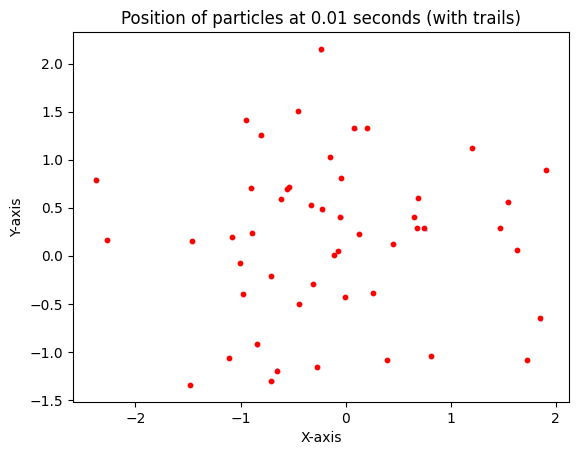

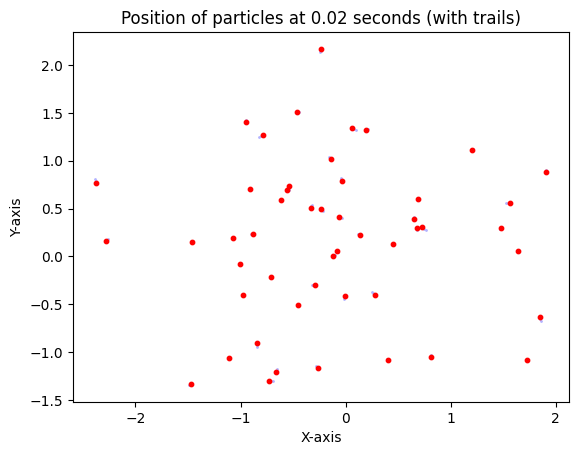

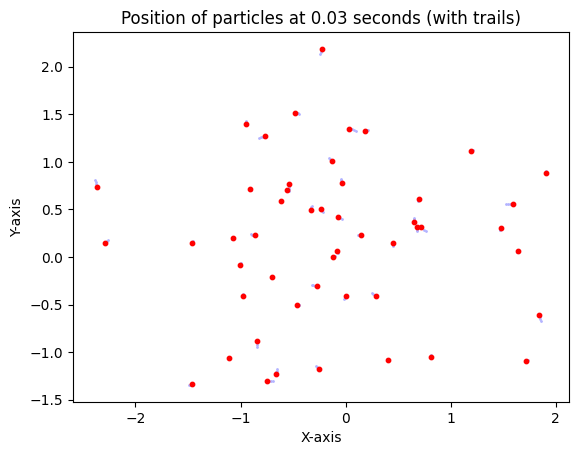

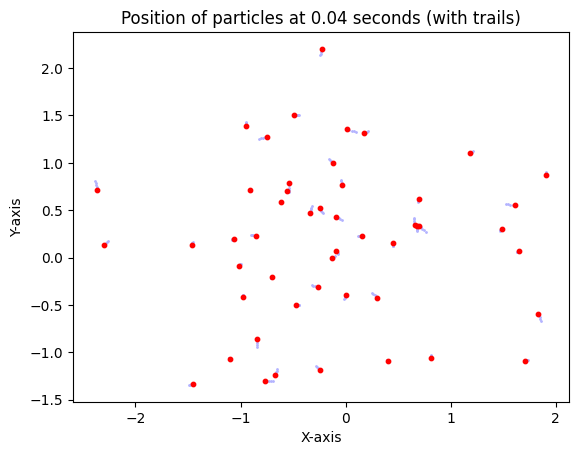

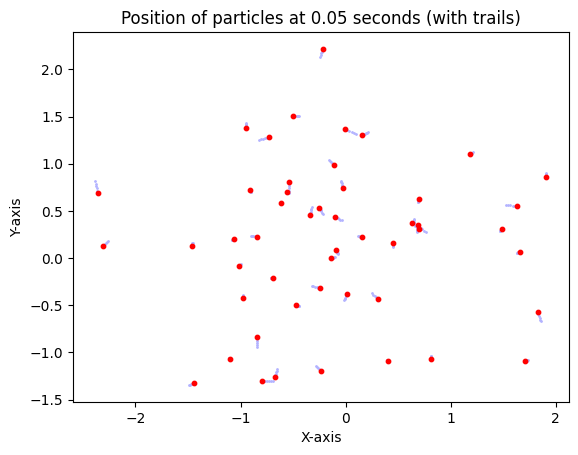

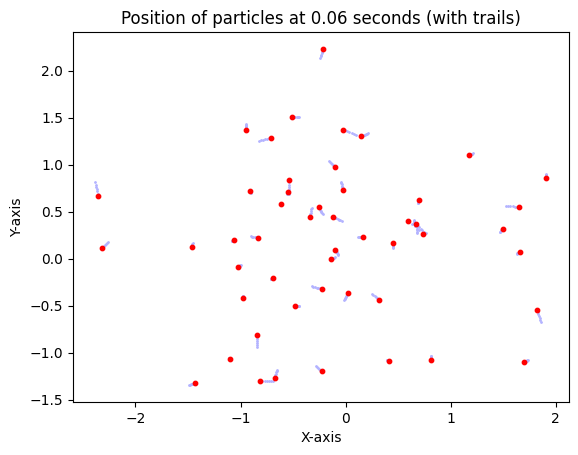

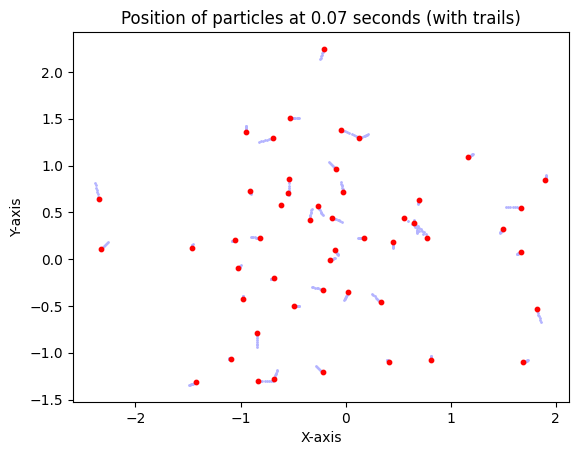

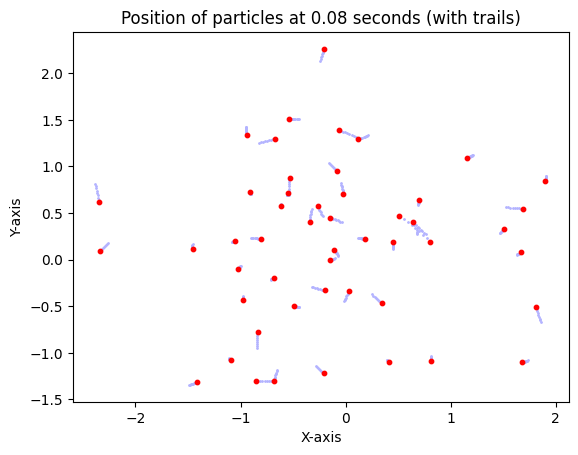

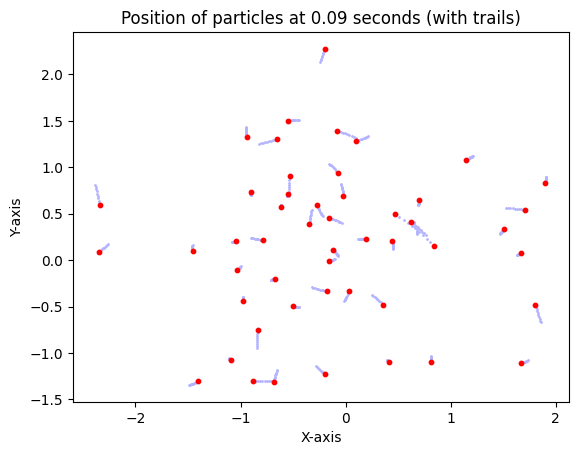

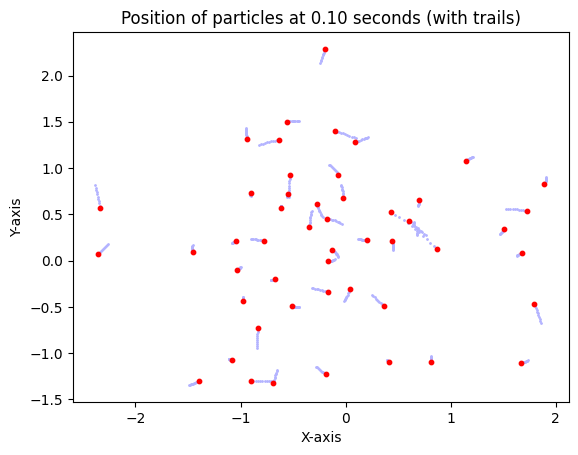

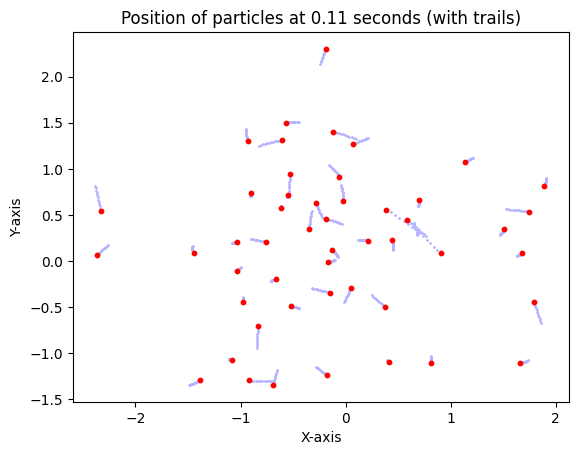

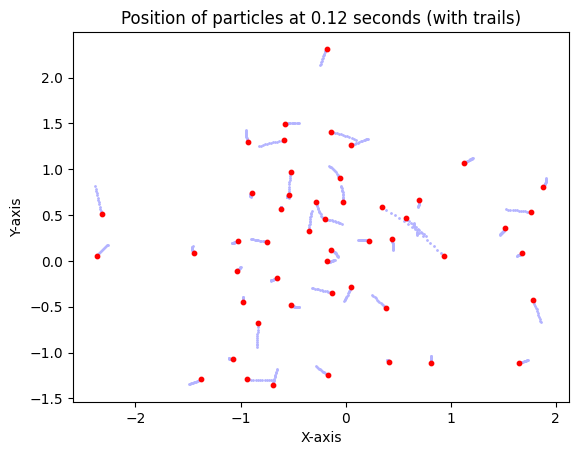

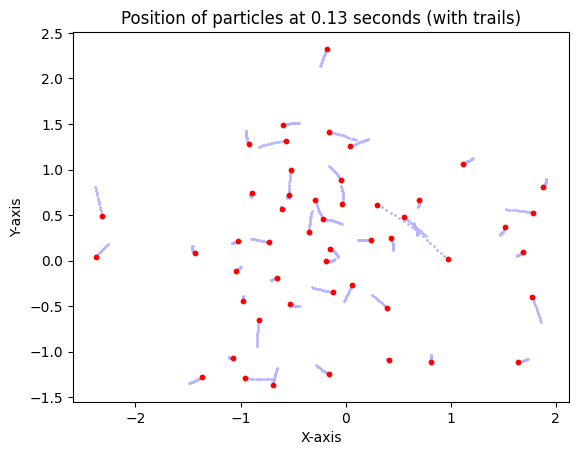

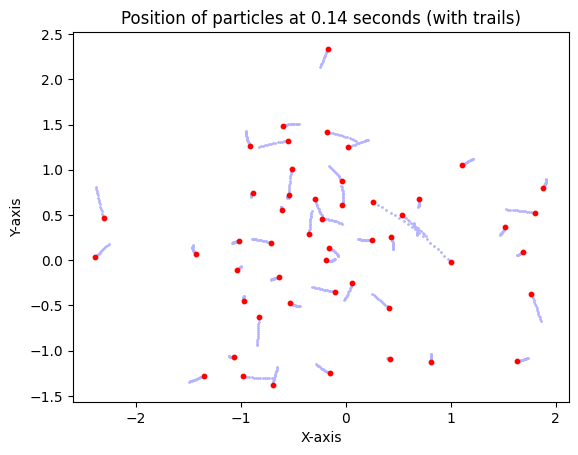

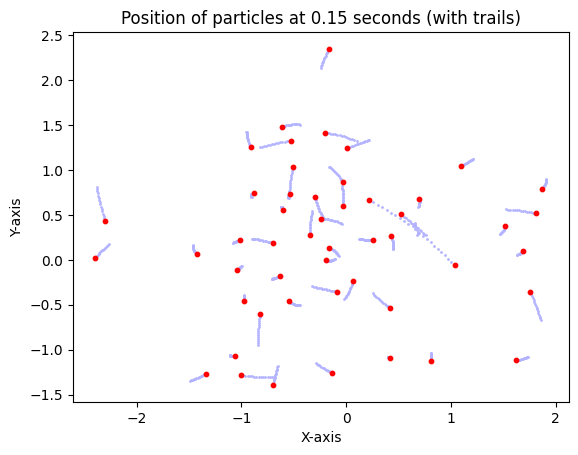

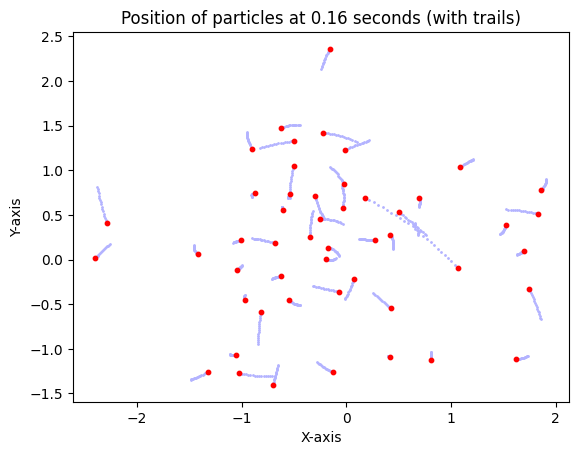

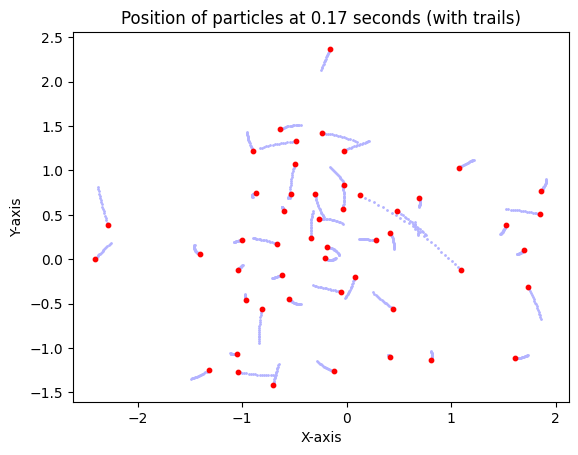

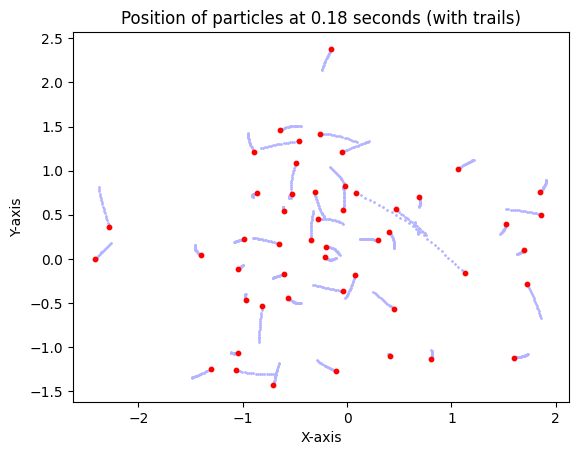

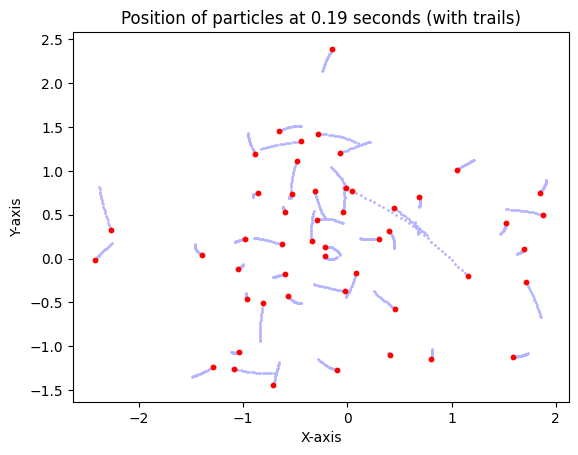

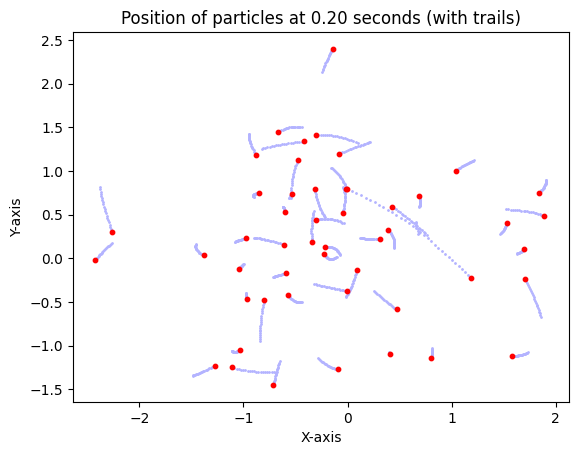

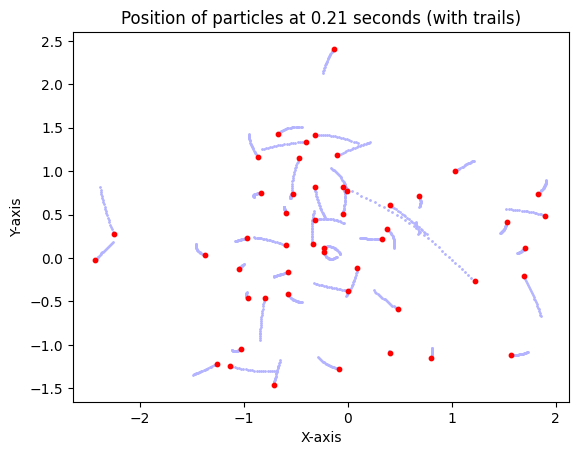

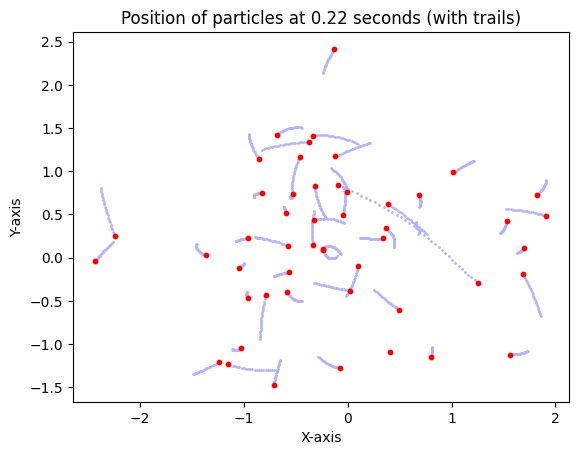

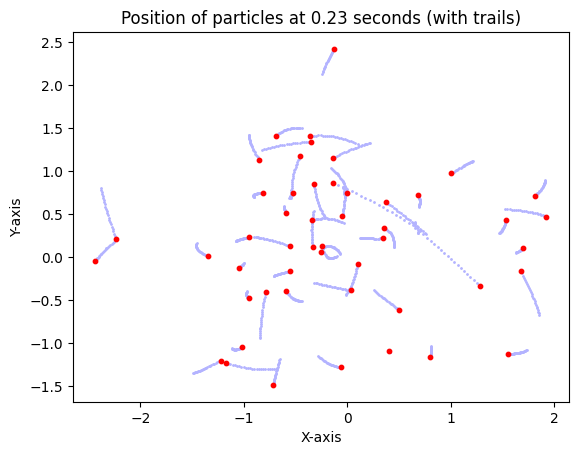

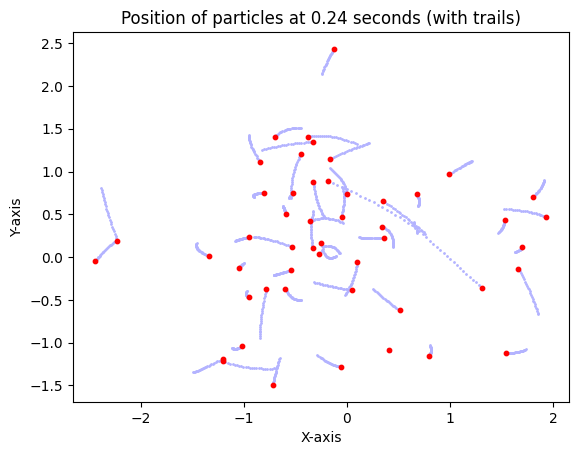

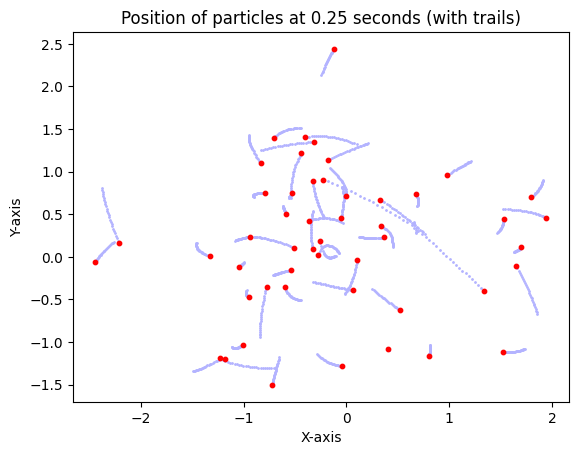

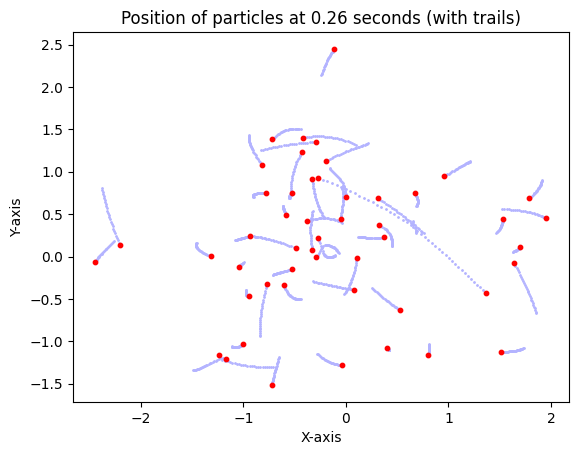

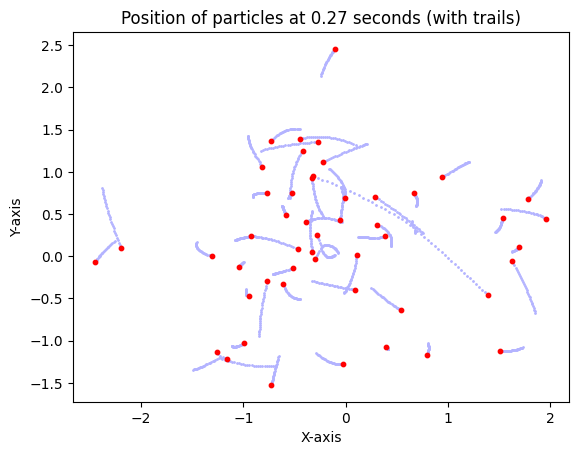

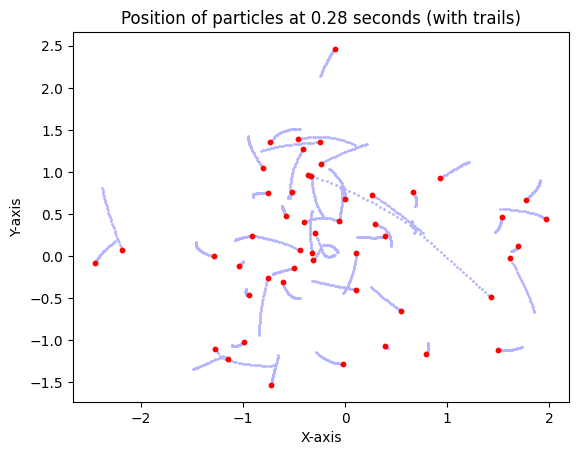

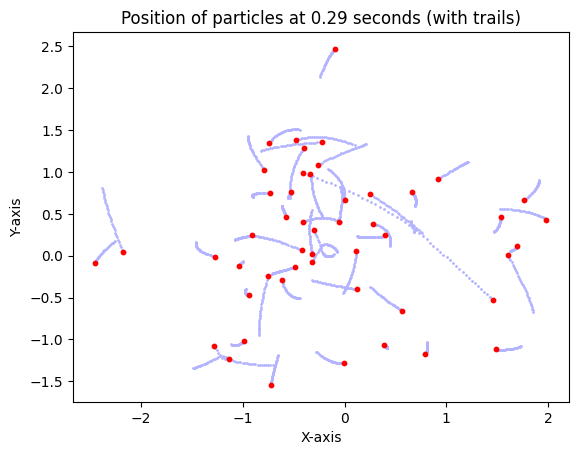

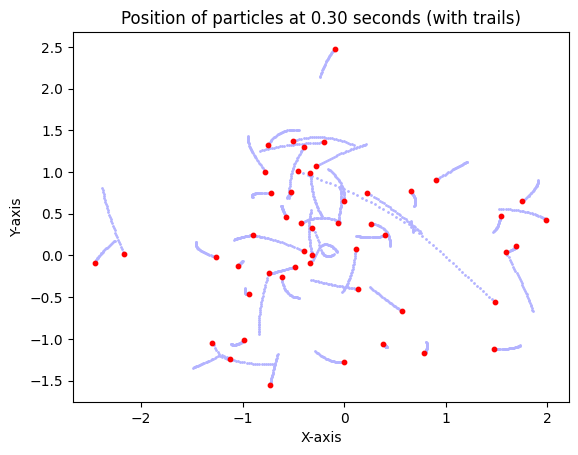

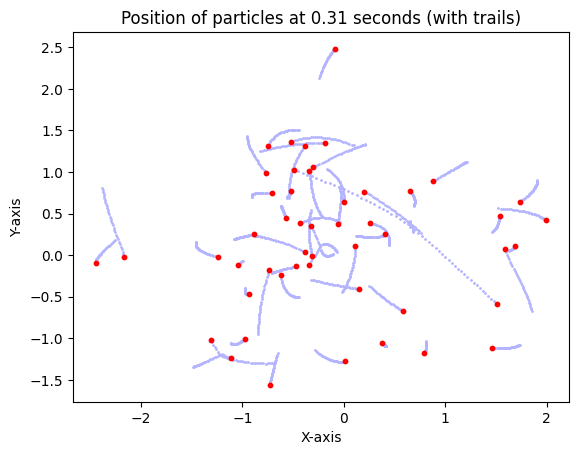

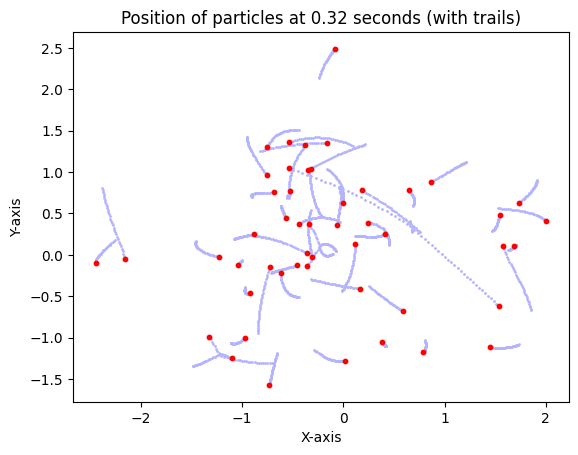

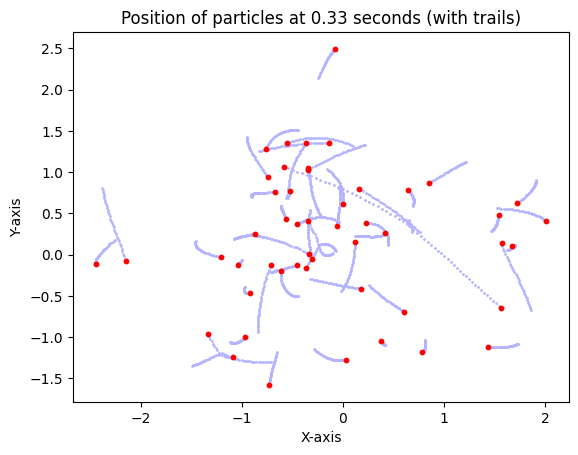

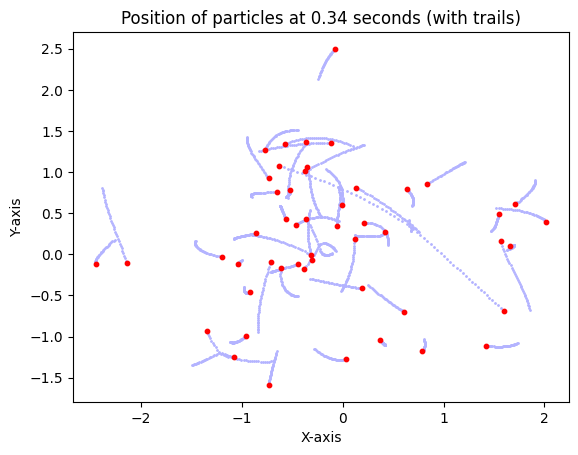

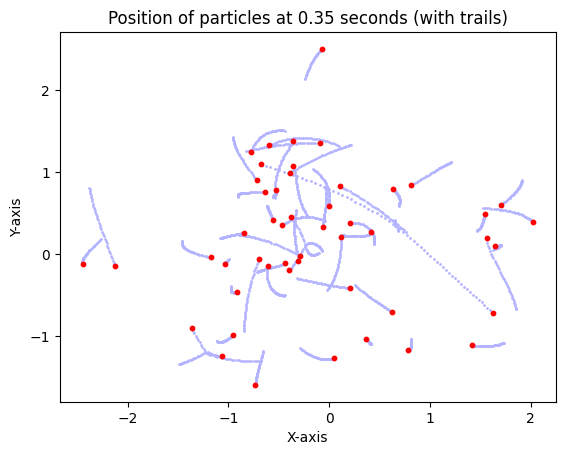

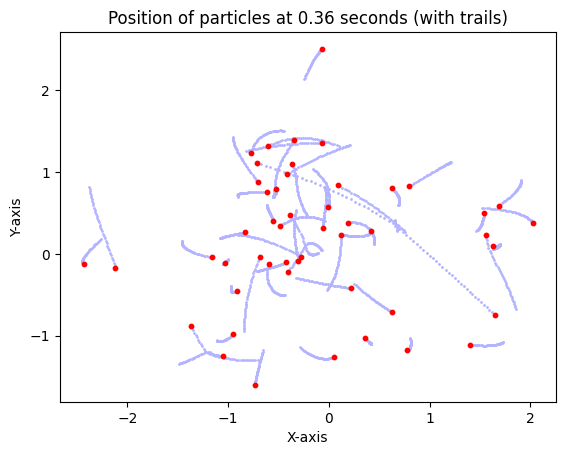

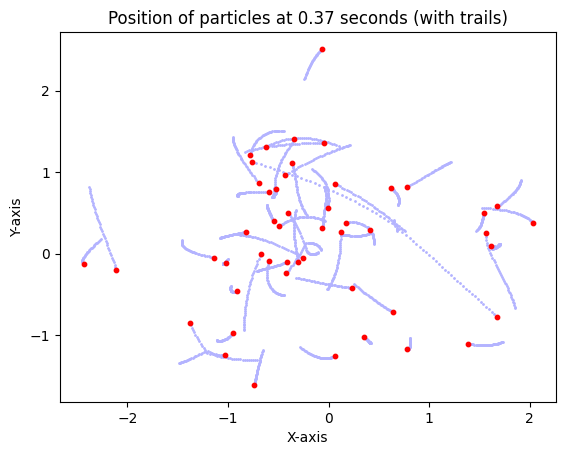

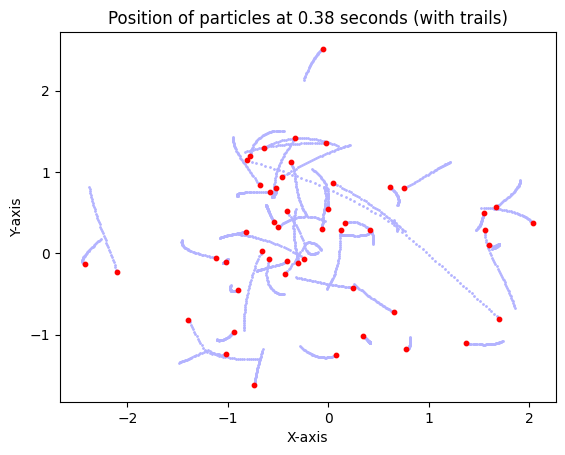

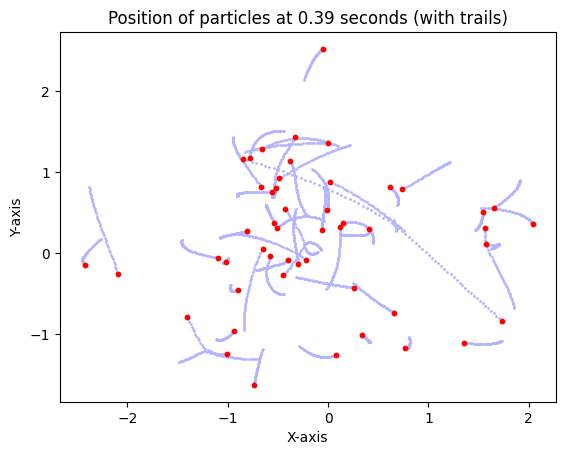

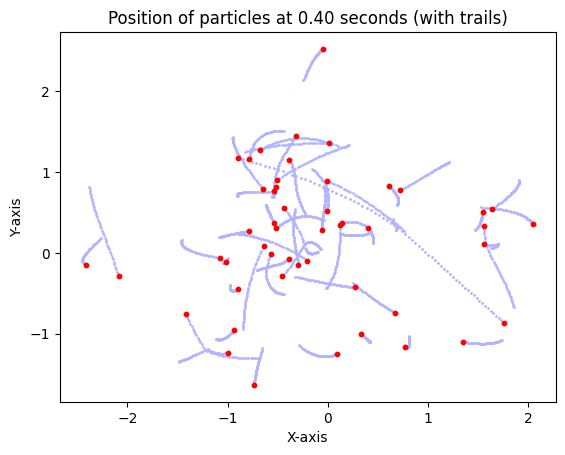

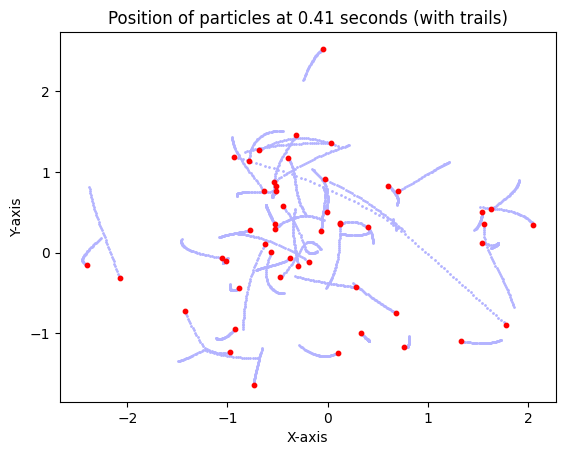

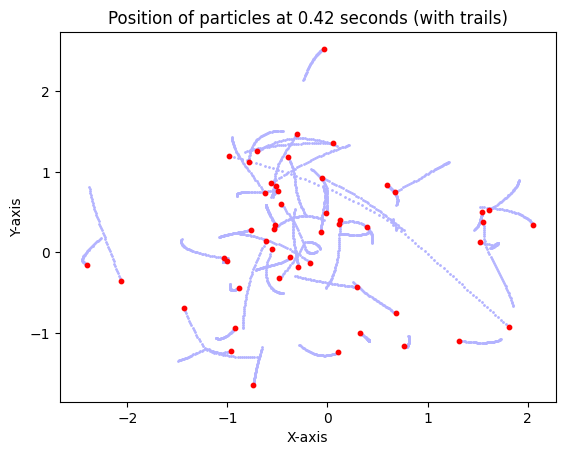

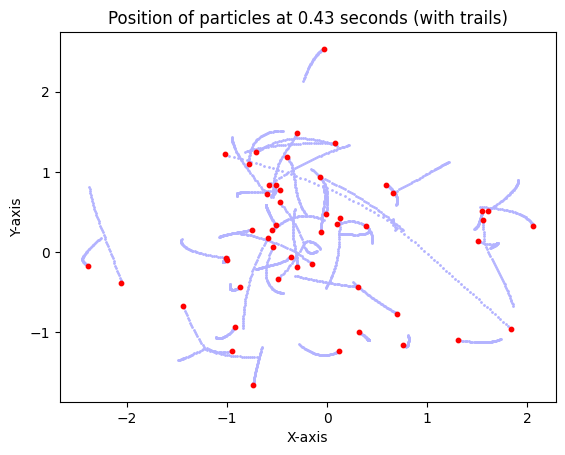

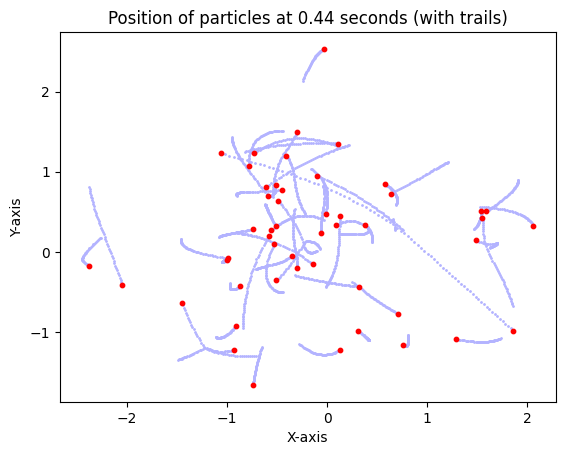

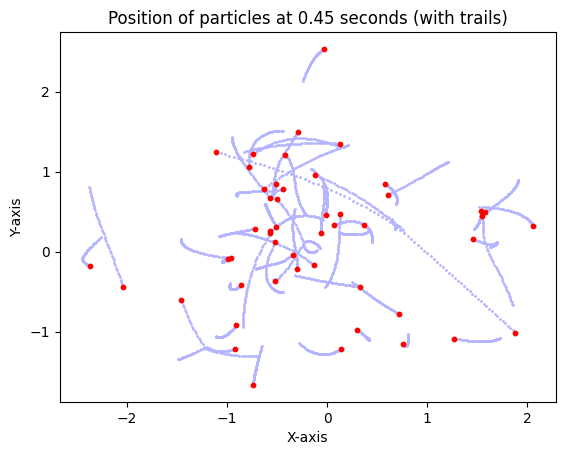

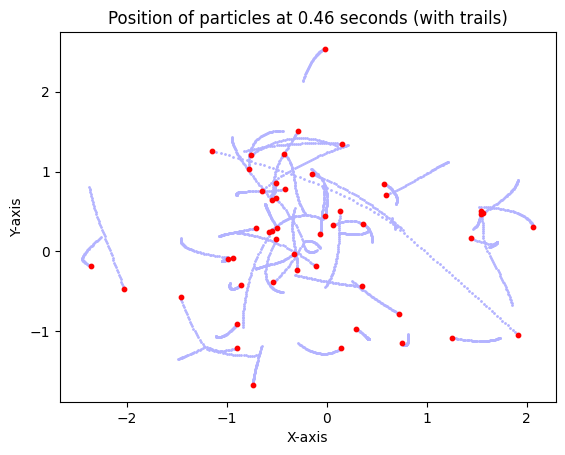

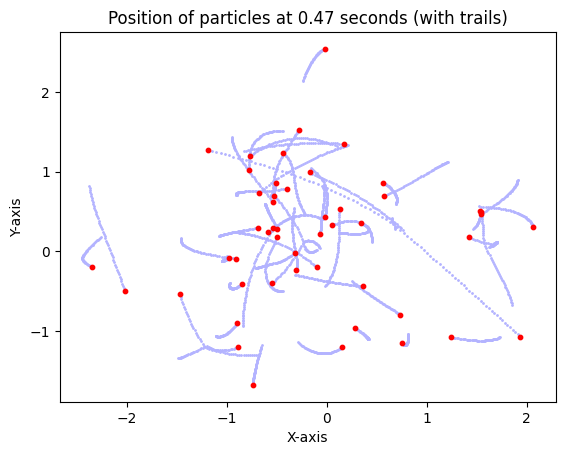

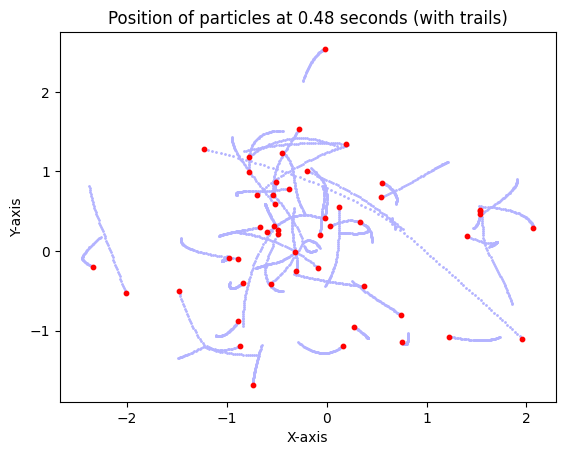

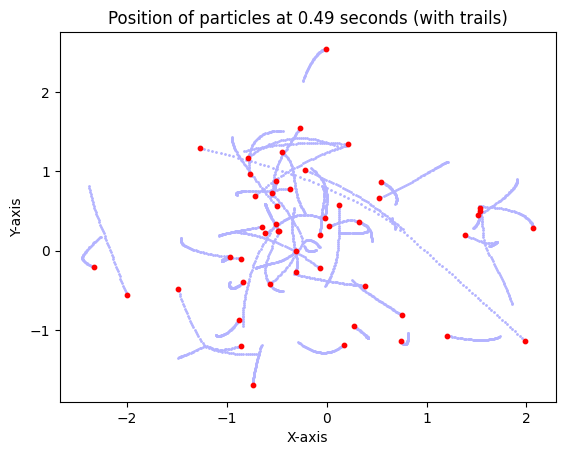

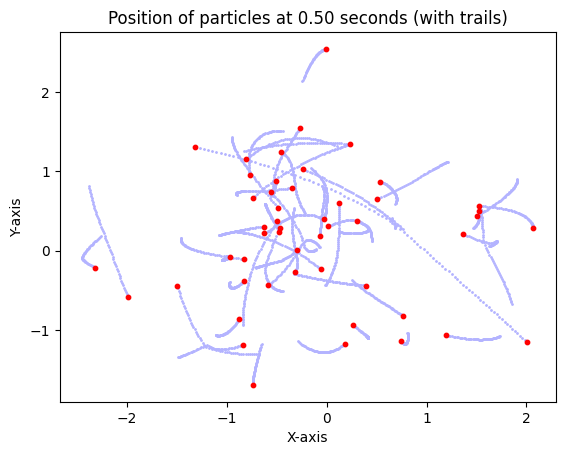

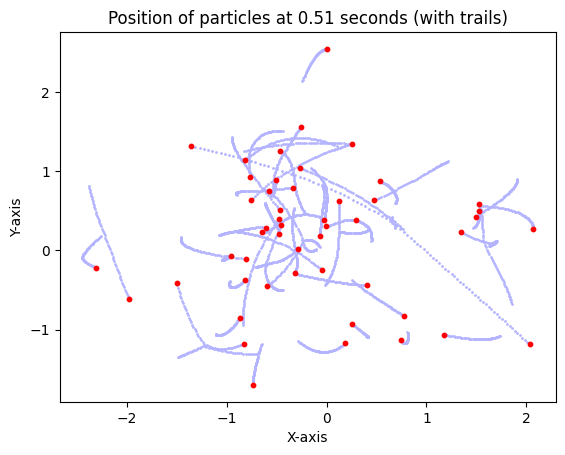

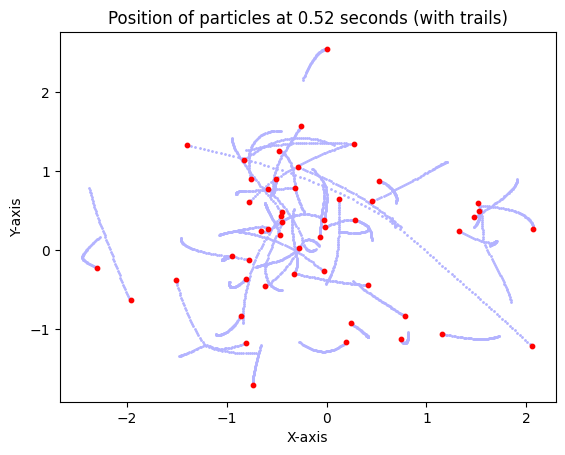

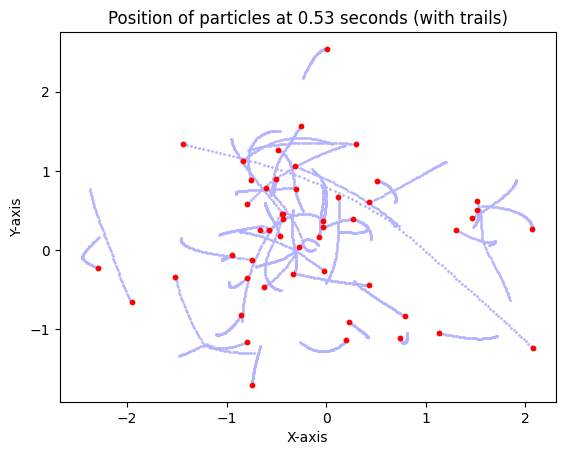

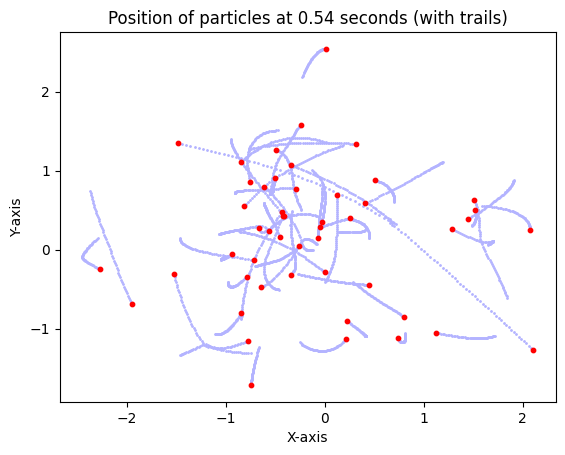

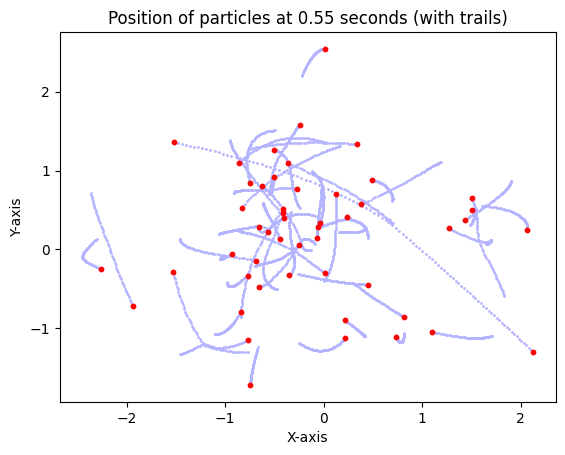

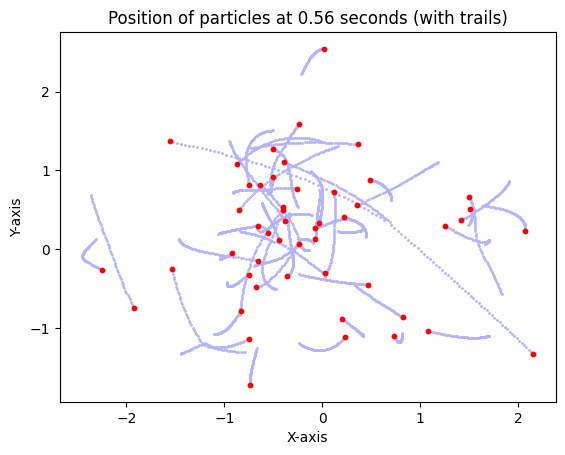

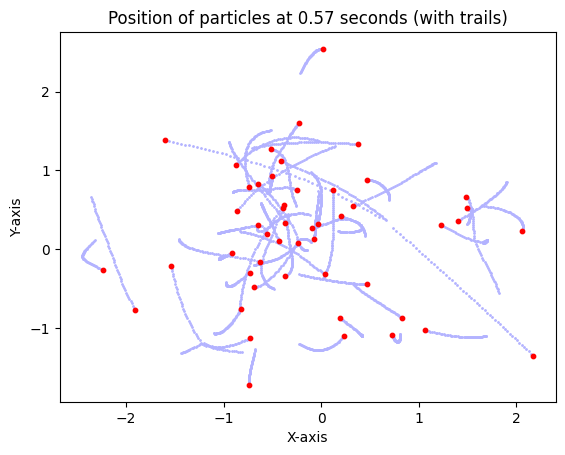

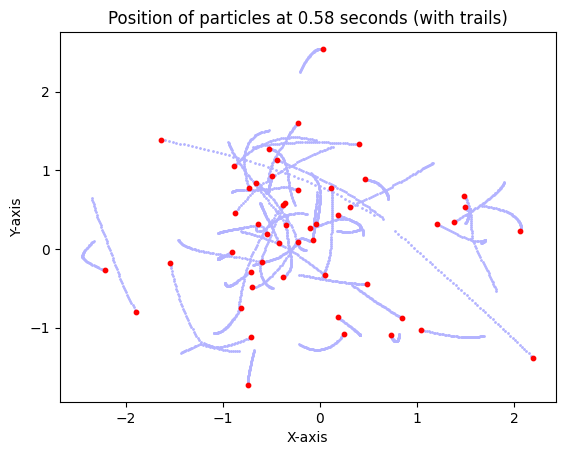

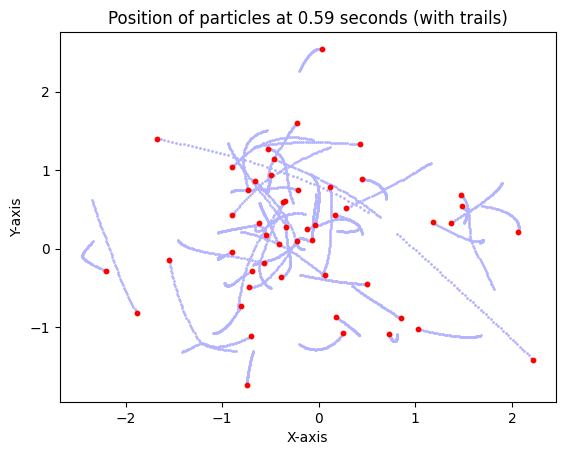

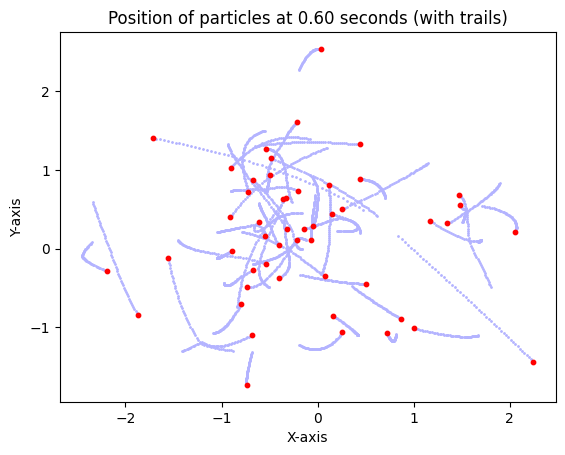

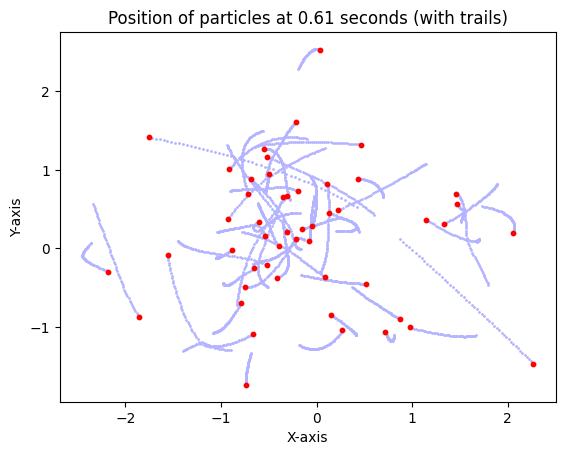

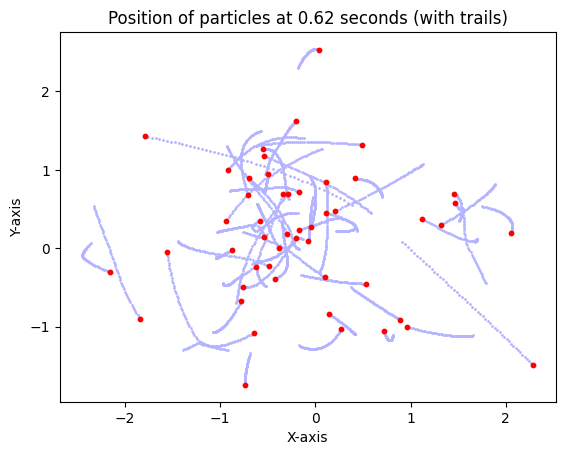

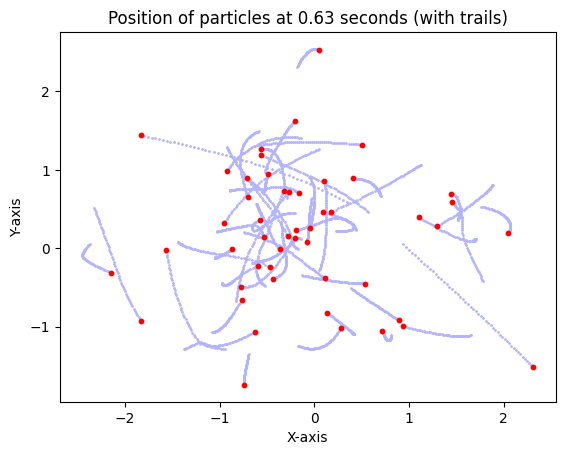

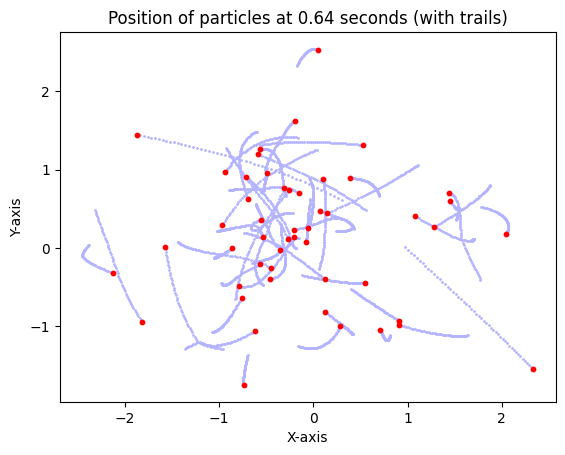

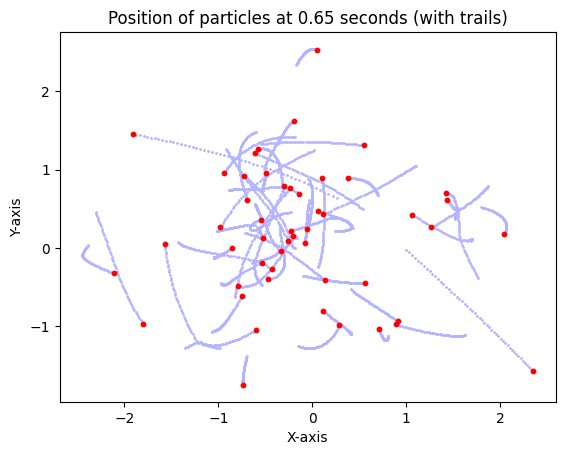

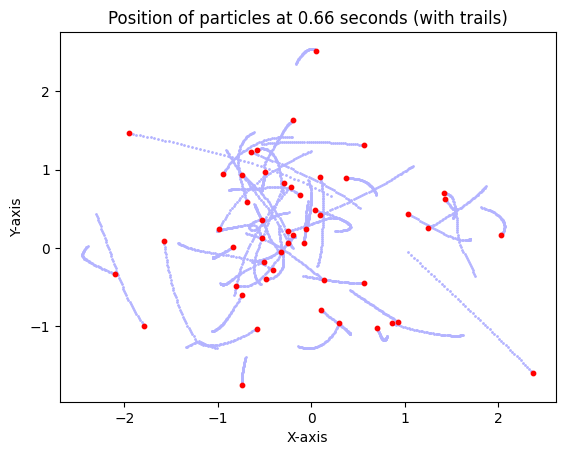

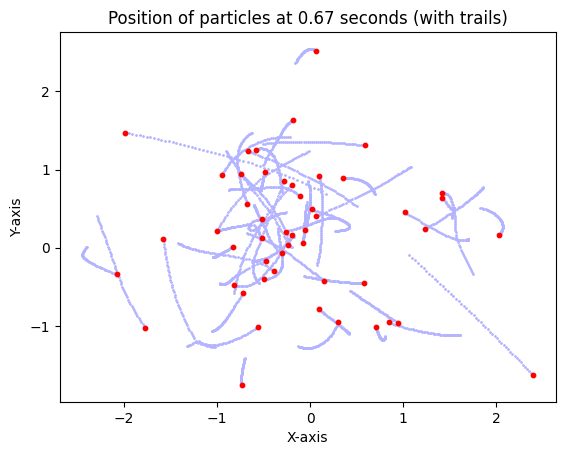

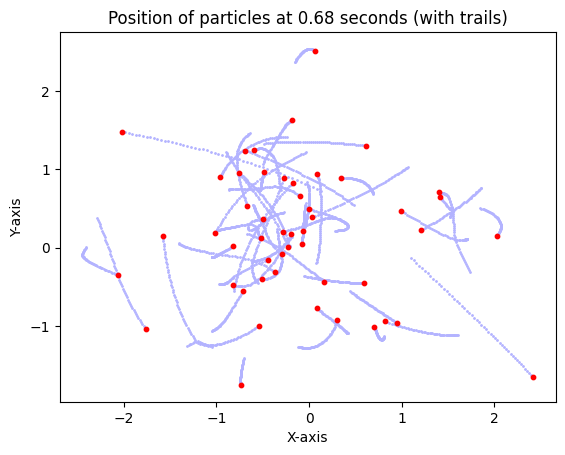

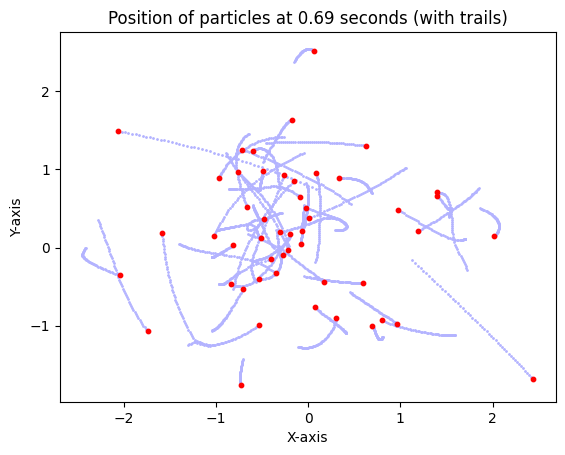

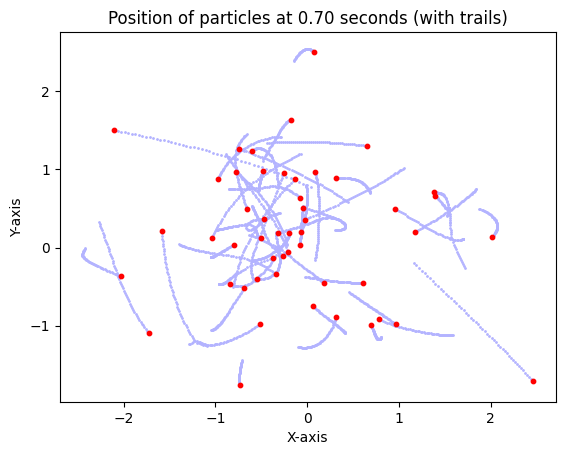

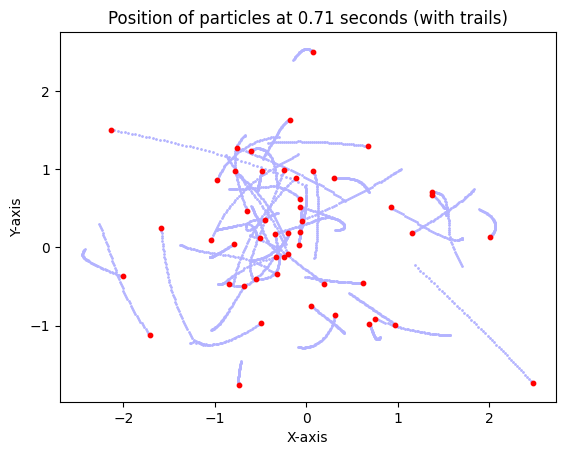

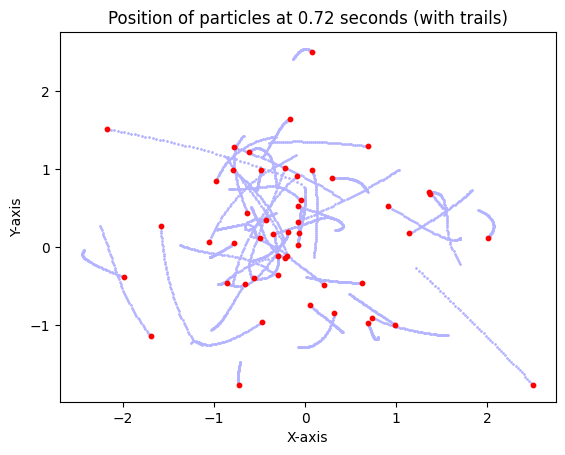

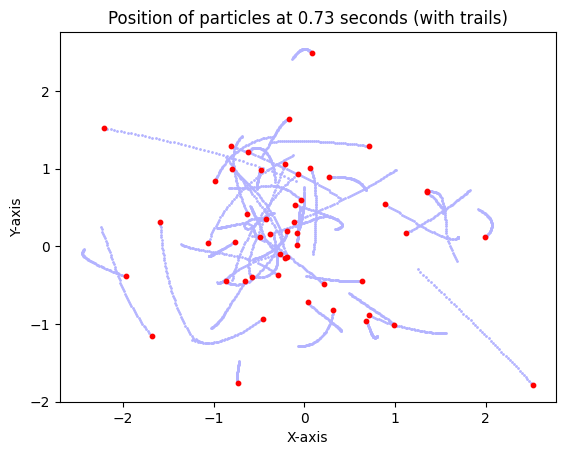

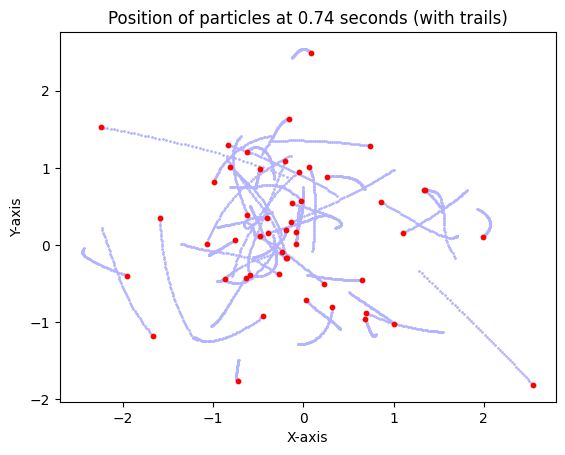

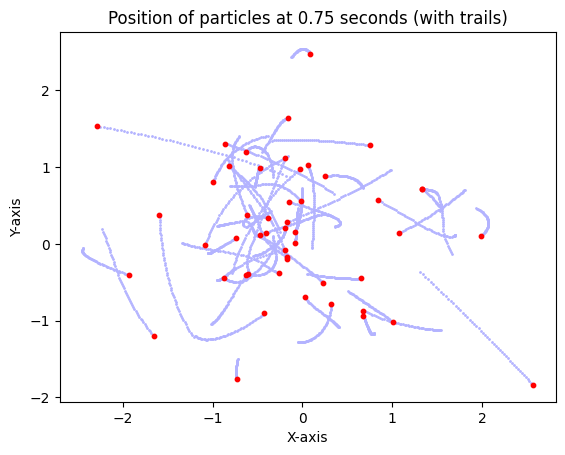

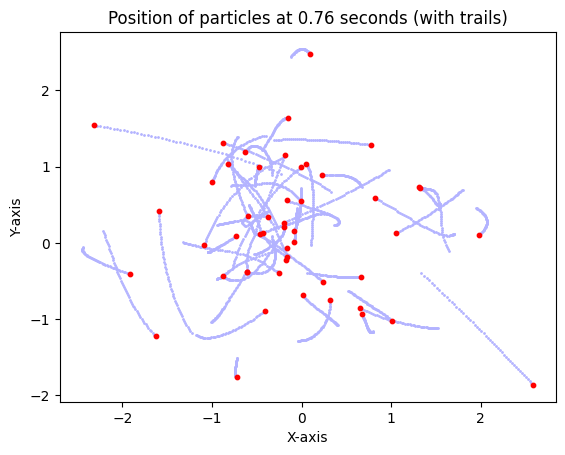

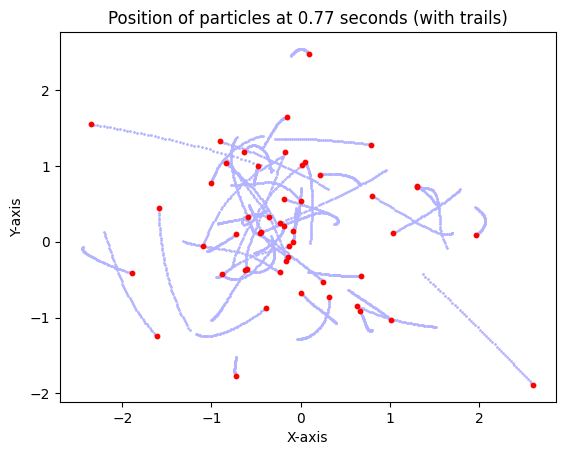

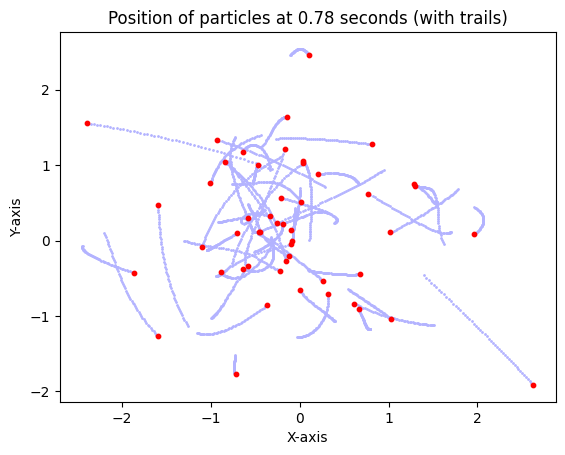

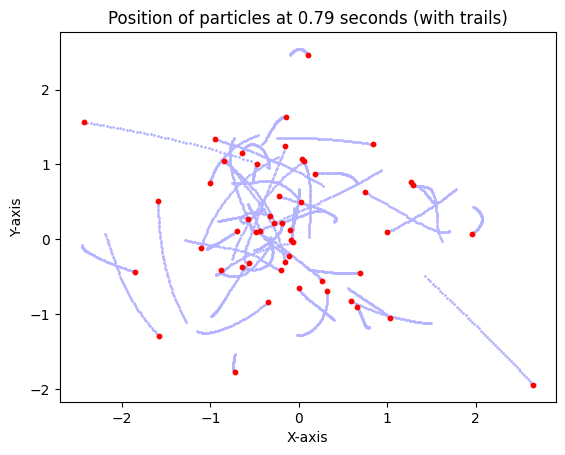

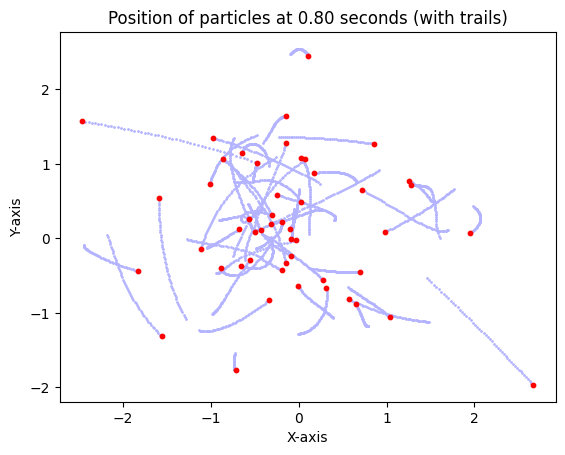

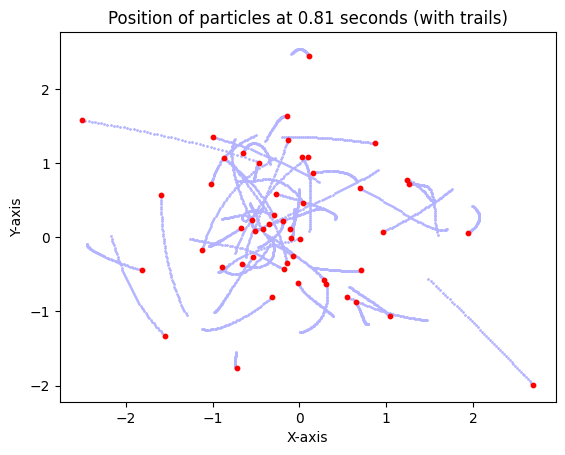

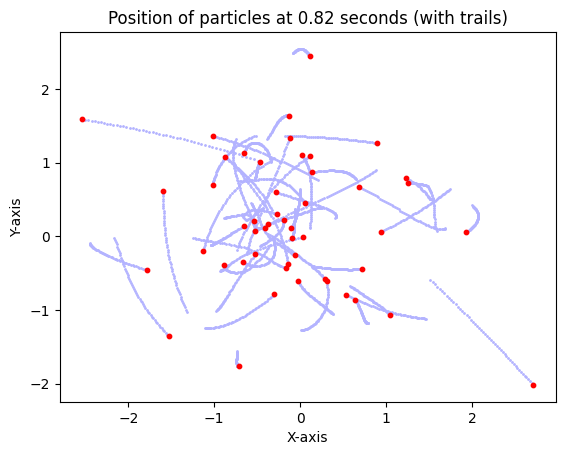

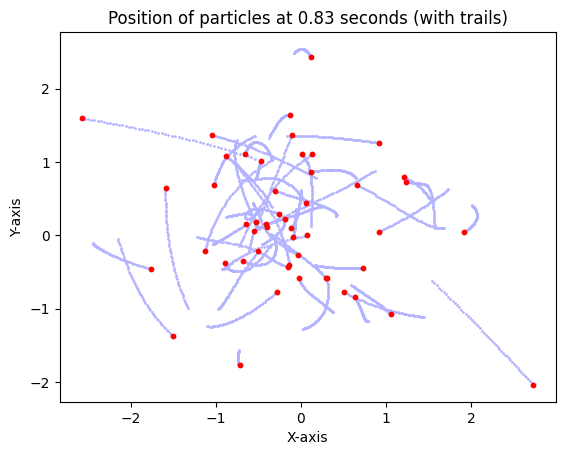

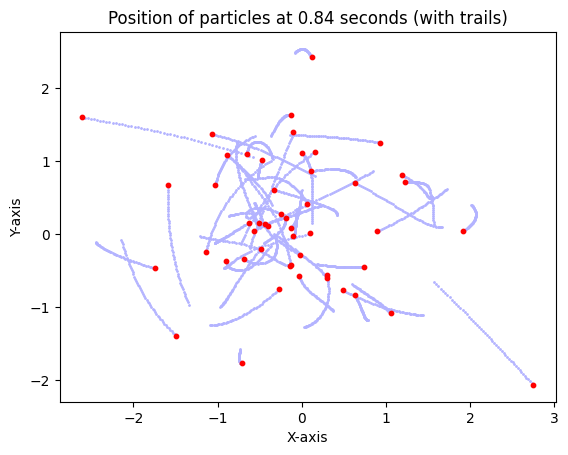

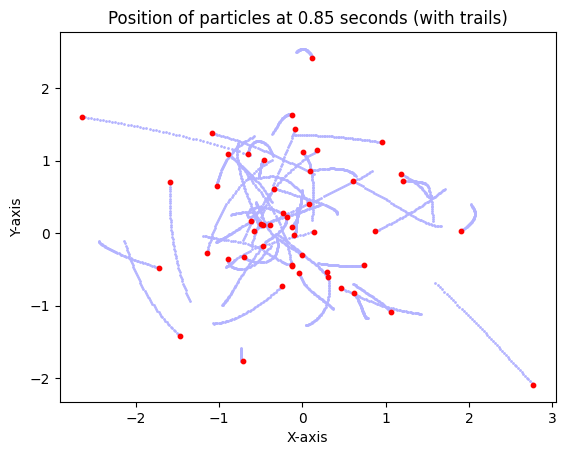

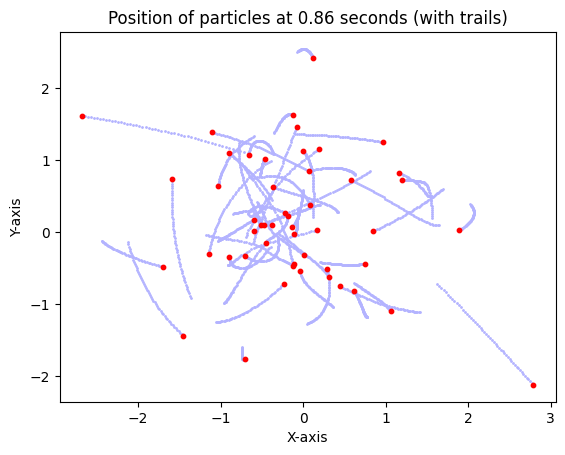

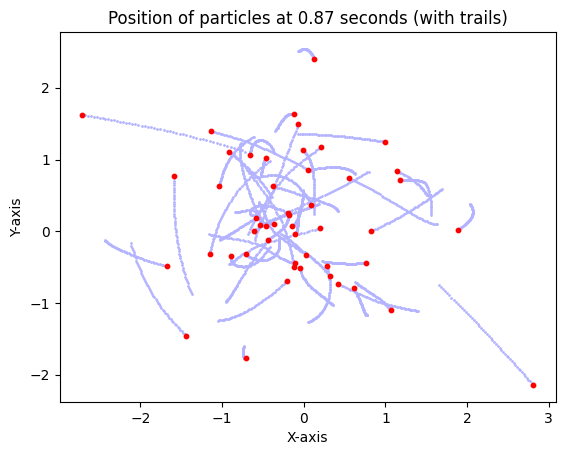

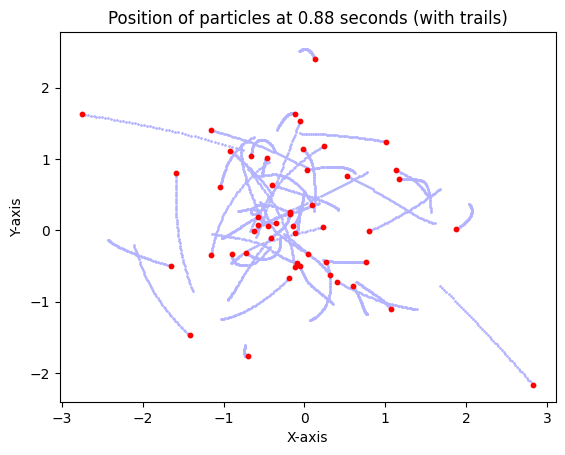

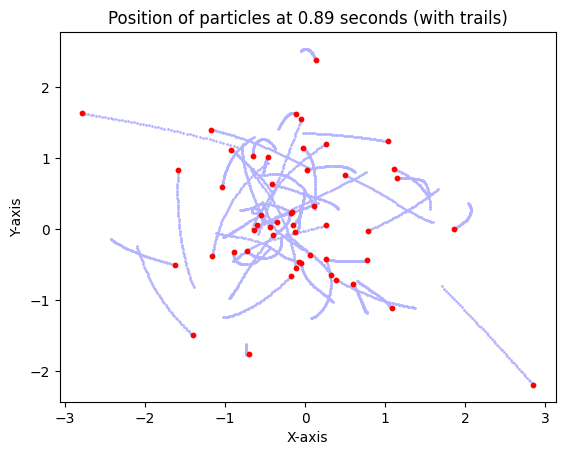

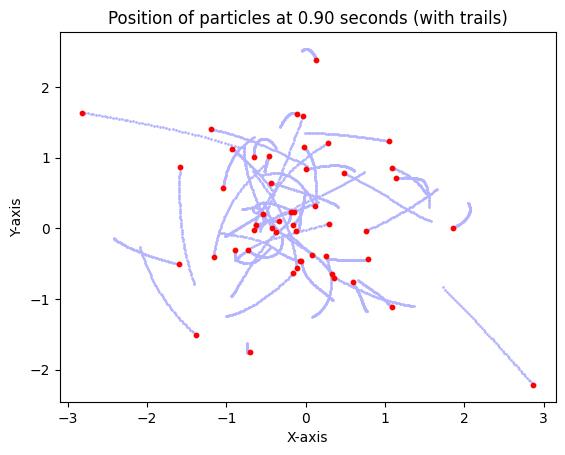

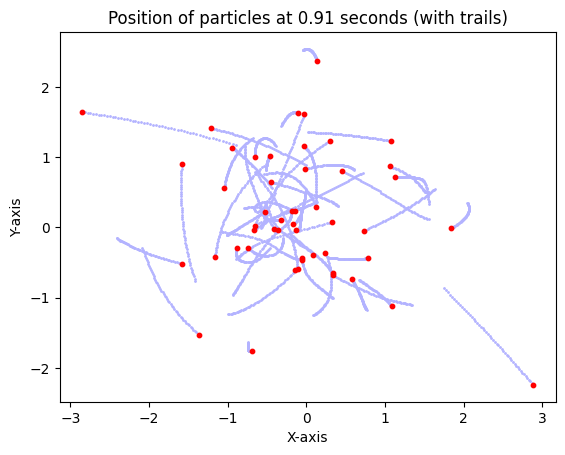

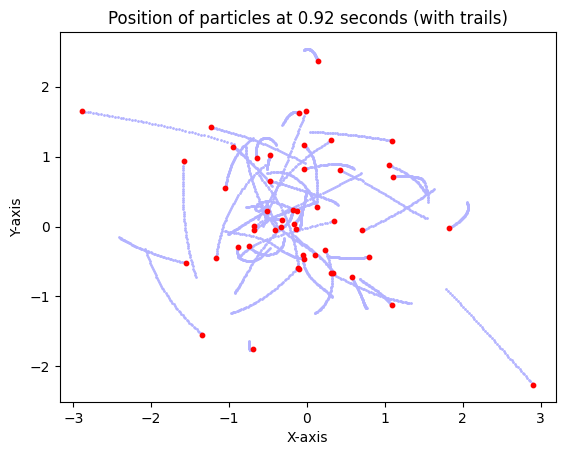

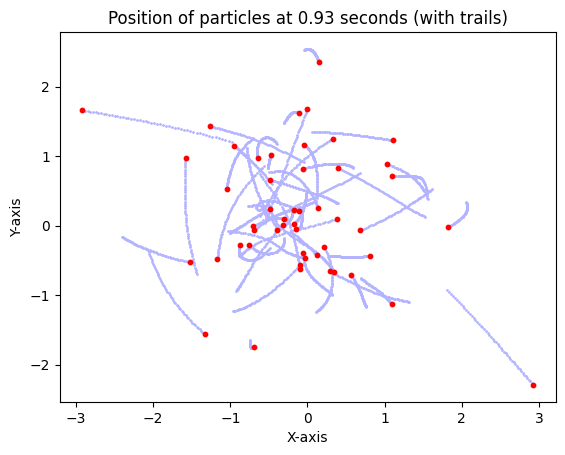

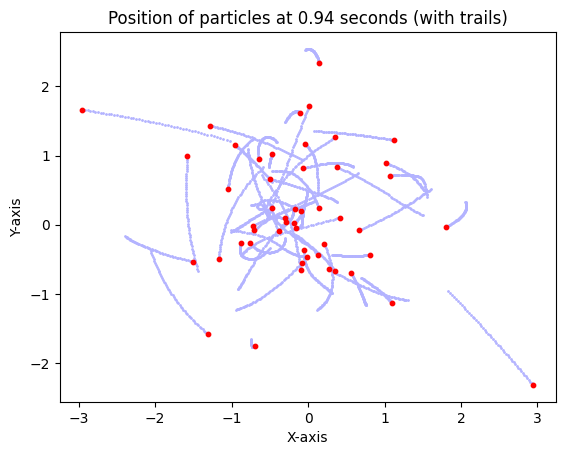

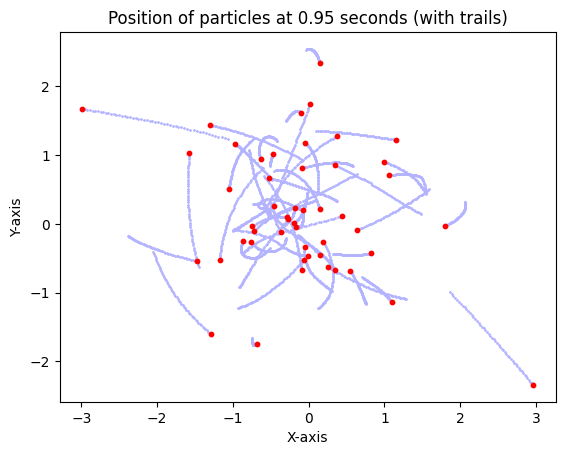

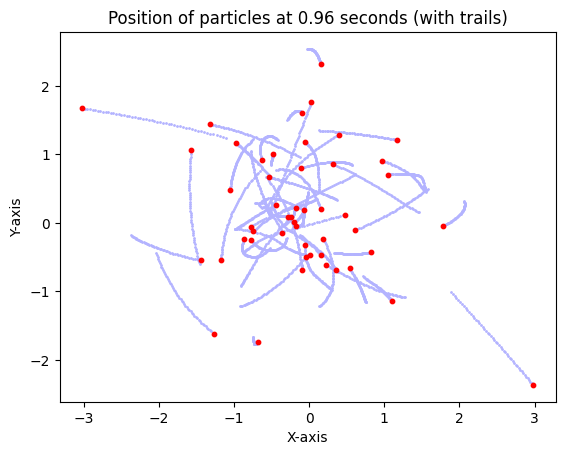

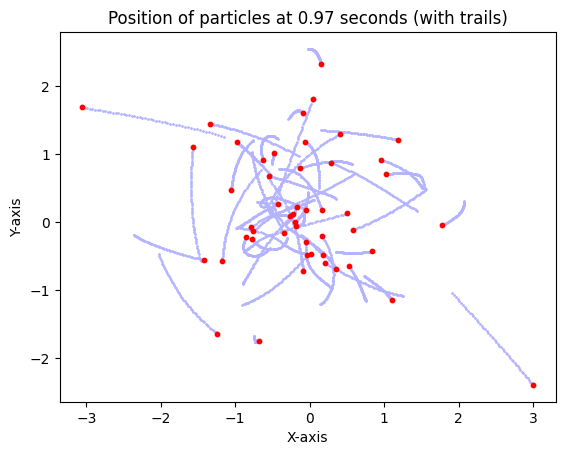

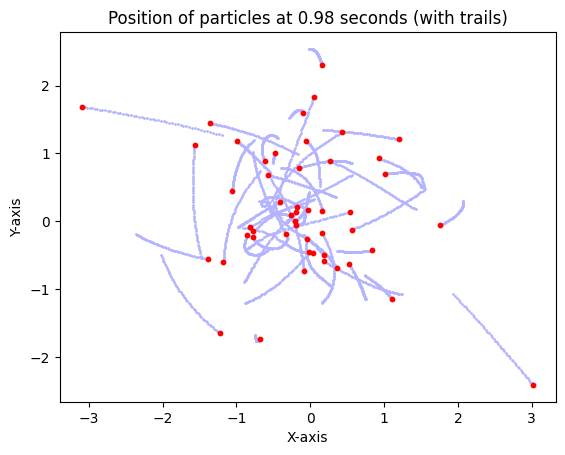

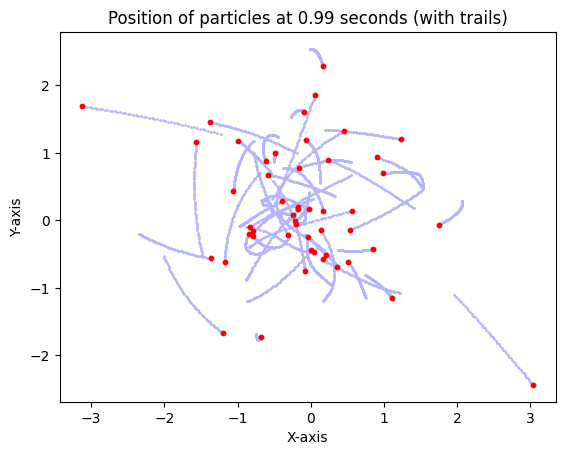

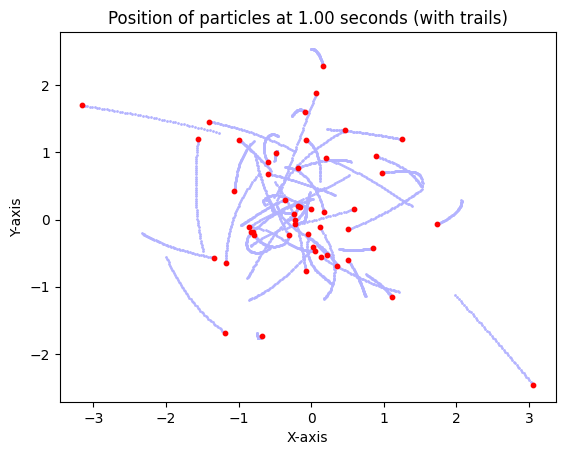

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as FuncAnimation

def calculate_acceleration(position, mass, gravitational_constant):

    x = position[:,0:1]
    y = position[:,1:2]
    z = position[:,2:3]

    dx = x.T - x
    dy = y.T - y
    dz = z.T - z

    #The inverse cube of the distance between the particles
    r_squared = dx**2 + dy**2 + dz**2

    r_cubed = np.where(r_squared > 0, r_squared**(-1.5), 0)

    #calculates the acceleration in the x-dimension, y-dimension and z-dimension using matrix multiplication
    acceleration_x = gravitational_constant * np.matmul(dx * r_cubed, mass)
    acceleration_y = gravitational_constant * np.matmul(dy * r_cubed, mass)
    acceleration_z = gravitational_constant * np.matmul(dy * r_cubed, mass)

    #The calculated accelerations in each dimension are concatenated horizontally
    acceleration = np.column_stack((acceleration_x, acceleration_y, acceleration_z))

    return acceleration

def initialize_particles(num_particles):
    #creates a 2-dimensional array filled with a specific mass value
    mass = np.full((num_particles, 1), 20.0 / num_particles)
    #generates a random array of shape for the initial position of the particles
    position = np.random.randn(num_particles, 3)
    #generates a random array of shape for the initial velocity of the particles
    velocity = np.random.randn(num_particles, 3)
    #subtracts the mean velocity of the system from the velocity array. It ensures that the system has no net motion or drift.
    velocity -= np.mean(velocity, axis=0)
    return mass, position, velocity

def save_initial_state(position, velocity, acceleration, num_time_steps):
    position_save = np.zeros((num_particles, 3, num_time_steps + 1))
    #assigns the initial positions of the particles to the first slice of position_save. It saves the initial state of the system.
    position_save[:, :, 0] = position

    velocity_save = np.zeros((num_particles, 3, num_time_steps + 1))
    #assigns the initial velocities of the particles to the first slice of position_save. It saves the initial state of the system.
    velocity_save[:, :, 0] = velocity

    acceleration_save = np.zeros((num_particles, 3, num_time_steps + 1))
    #assigns the initial accelerations of the particles to the first slice of position_save. It saves the initial state of the system.
    acceleration_save[:, :, 0] = acceleration

    return position_save, velocity_save, acceleration_save

gravitational_constant = 1.0
time = 0
end_time = 1.0
time_step = 0.01
num_particles = 50
mass, position, velocity = initialize_particles(num_particles)
acceleration = calculate_acceleration(position, mass, gravitational_constant)
#calculates the total number of time steps required to reach the end_time based on the given time_step. It uses np.ceil to round up to the nearest integer.
num_time_steps = int(np.ceil(end_time / time_step))
position_save, velocity_save, acceleration_save = save_initial_state(position, velocity, acceleration, num_time_steps)

for i in range(num_time_steps):
    #updates the velocity of the particles,accounts for the change in velocity over half of the time step
    velocity += acceleration * time_step/2.0
    #updates the position of the particles based on their velocities, accounts for the change in position over the full time step
    position += velocity * time_step
    #calculates the new accelerations of the particles based on their updated positions
    acceleration = calculate_acceleration(position, mass, gravitational_constant)
    time += time_step
    velocity += acceleration * time_step/2.0
    # saves the updated positions of the particles in the array at the corresponding time step index
    position_save[:, :, i+1] = position
    # saves the updated velocities of the particles in the array at the corresponding time step index
    velocity_save[:, :, i+1] = velocity
    # saves the updated accerations of the particles in the array at the corresponding time step index
    acceleration_save[:, :, i+1] = acceleration

    if True:
      # Position plan graph, with an updating time
      '''extracts a portion of the position_save array for the x-coordinate of the particles' positions.
      It selects the rows for all particles, the column corresponding to the x-coordinate (0), and a range of columns from i to i + 1.'''
      xx = position_save[:,0,max(i-50,0):i+1]
      yy = position_save[:,1,max(i-50,0):i+1]
      plt.scatter(xx,yy,s=1,c=[.7,.7,1])
      plt.scatter(position[:,0],position[:,1],s=10,color='red')
      plt.xlabel('X-axis')
      plt.ylabel('Y-axis')
      plt.title(f'Position of particles at {time:.2f} seconds (with trails)')
      plt.xlim=(-2, 2)
      plt.ylim=(-2, 2)
      #allows the plot to be displayed and updated in real-time
      plt.pause(0.00001)

plt.show()

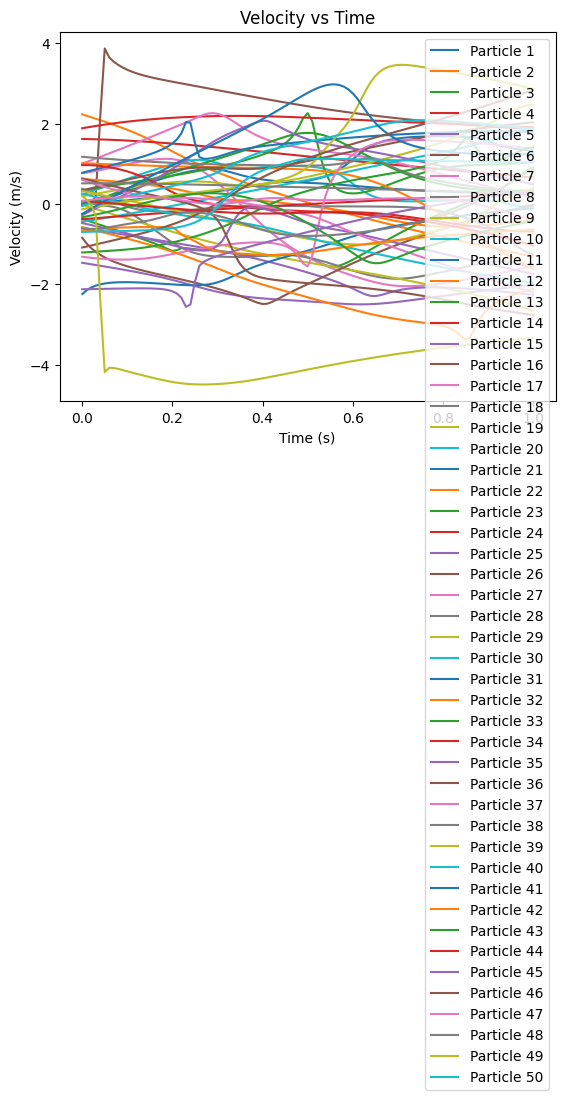

In [ ]:
# Plot velocity vs time
fig, ax = plt.subplots()
time_values = np.linspace(0, end_time, num_time_steps + 1)
for particle_index in range(num_particles):
    ax.plot(time_values, velocity_save[particle_index, 0, :], label=f"Particle {particle_index+1}")
ax.set_xlabel('Time (s)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Velocity vs Time')
ax.legend()
plt.show()

In [ ]:
n=0.00
while n <= 1.00:
  time_index = int(n* num_time_steps)  # the desired time index you want to calculate the sum for

  # Sum the velocity values at the specified time index for all particles
  velocity_sum = np.sum(velocity_save[:, :, time_index])
  print(f'Sum of velocities at time {time_values[time_index]:.2f}: {velocity_sum}')
  n += 0.01

Sum of velocities at time 0.00: 4.440892098500626e-15
Sum of velocities at time 0.01: -1.3322676295501878e-15
Sum of velocities at time 0.02: 2.220446049250313e-15
Sum of velocities at time 0.03: -2.6645352591003757e-15
Sum of velocities at time 0.04: -1.7763568394002505e-15
Sum of velocities at time 0.05: -2.6645352591003757e-15
Sum of velocities at time 0.06: -2.6645352591003757e-15
Sum of velocities at time 0.07: 4.440892098500626e-15
Sum of velocities at time 0.08: -4.440892098500626e-16
Sum of velocities at time 0.09: -1.9984014443252818e-15
Sum of velocities at time 0.10: -2.6645352591003757e-15
Sum of velocities at time 0.10: -2.6645352591003757e-15
Sum of velocities at time 0.11: 8.881784197001252e-16
Sum of velocities at time 0.12: 8.881784197001252e-16
Sum of velocities at time 0.13: 1.5543122344752192e-15
Sum of velocities at time 0.15: -2.220446049250313e-15
Sum of velocities at time 0.16: -4.440892098500626e-16
Sum of velocities at time 0.17: 5.10702591327572e-15
Sum of ve

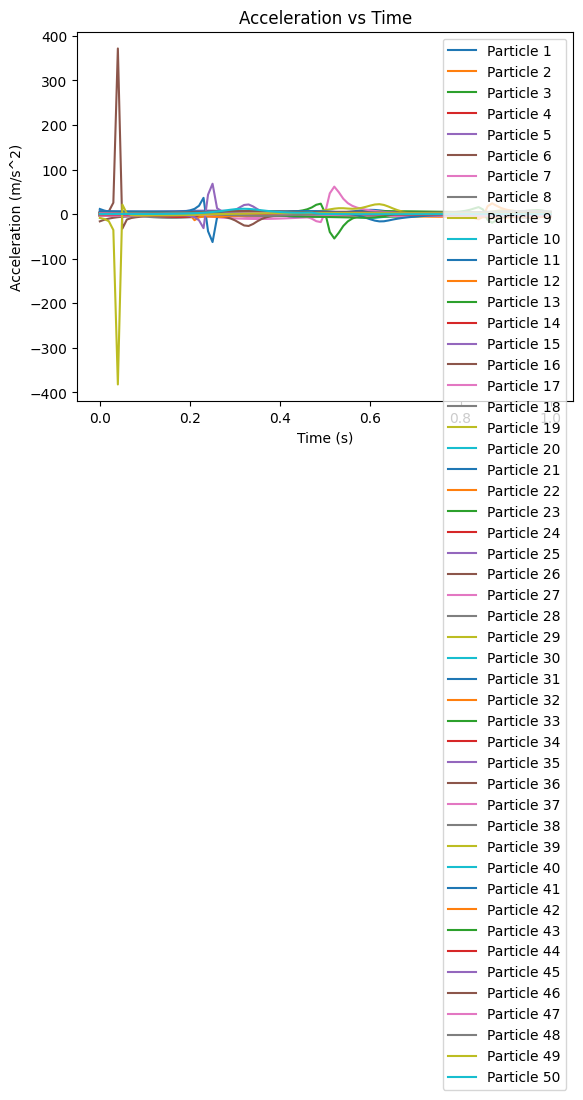

In [ ]:
# Plot acceleration vs time
fig, ax = plt.subplots()
time_values = np.linspace(0, end_time, num_time_steps + 1)
for particle_index in range(num_particles):
    ax.plot(time_values, acceleration_save[particle_index, 0, :], label=f"Particle {particle_index+1}")
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration (m/s^2)')
ax.set_title('Acceleration vs Time')
ax.legend()
plt.show()

In [ ]:
n=0.00
while n <= 1.00:
  time_index = int(n* num_time_steps)  # the desired time index you want to calculate the sum for

  # Sum the velocity values at the specified time index for all particles
  acceleration_sum = np.sum(acceleration_save[:, :, time_index])
  print(f'Sum of accelerations at time {time_values[time_index]:.2f}: {acceleration_sum}')
  n += 0.01



Sum of accelerations at time 0.00: -7.105427357601002e-15
Sum of accelerations at time 0.01: 7.105427357601002e-15
Sum of accelerations at time 0.02: 1.4210854715202004e-14
Sum of accelerations at time 0.03: 4.263256414560601e-14
Sum of accelerations at time 0.04: 7.105427357601002e-15
Sum of accelerations at time 0.05: 3.552713678800501e-15
Sum of accelerations at time 0.06: 0.0
Sum of accelerations at time 0.07: 1.0658141036401503e-14
Sum of accelerations at time 0.08: 1.0658141036401503e-14
Sum of accelerations at time 0.09: 7.105427357601002e-15
Sum of accelerations at time 0.10: 1.0658141036401503e-14
Sum of accelerations at time 0.10: 1.0658141036401503e-14
Sum of accelerations at time 0.11: -3.552713678800501e-15
Sum of accelerations at time 0.12: -1.0658141036401503e-14
Sum of accelerations at time 0.13: -7.105427357601002e-15
Sum of accelerations at time 0.15: -7.105427357601002e-15
Sum of accelerations at time 0.16: 0.0
Sum of accelerations at time 0.17: 0.0
Sum of accelerati

#Testing and Validation

We included some computations for the total of velocities and the sum of accelerations at each time step to verify our code. We received findings that were very near to zero, which both of them were theoretically meant to give us.
Our list of findings didn't contain any divergent numbers (big results), so we knew it was accurate. We may infer that the experiment was reasonably accurate because they were all very close to zero, which is theoretically the correct response. Of course, we could have added additional particles to make it even closer to zero but that would have taken more time to process.

By experimenting with various time step sizes, we were also able to determine if the numerical approaches were stable. While more accurate findings were obtained with smaller time increments, the tradeoff was longer computation times. Ultimately, when using different timesteps it always converged to the same answer.
We also determined that their was the conservation of acceleration which assured us that our formulas and numerical methods were correct.


#Results


Our simulation of the N-body represents the behaviour between particles due to gravity. The behaviour can be seen in the first set of graphs which acts as a plan that we see from above, as we see the particles moving all around this plan. By running it a couple of times, we see that the starting position of the particles is random, therefore, the behaviour changes everytime we run it. We are able to notice how some particles are moving super fast compared to others and how the trajectories of the particles are all continuous even if some accelerates and some slows down. Although that could happen if the net force was 0 at the beginning of the simulation, no particle stops during the simulation. Some particles curves to the right or to the left, while some particles even follow a 180 degree curve.

We displayed our results using two graphs. The first graph shows the velocity of every particle during the simulation. It shows that no velocity stays constant throughout the experiment as they are being subject to a force. This force also creates an acceleration. We also see how the velocities go all around the graph and can change drastically within that 1 second of experiment. Although we can see how the velocities have unregular fluctuations, they are almost perfectly distributed over and under the 0 mark. We see how the velocities seem to be in a pretty similar range, between -4 m/s and 4 m/s.

The second graph shows that the acceleration of all the particles are evenly distributed over and under 0. The accelerations look somewhat constant in this graph as we see how the lines of most particles are almost straight throughout the graph. We can also see how there are exceptions for the fluctuating particles but every time there is one exception in the positive section of the graph, there is one in the negative part. That shows how they are evened out, even the exceptions. The accelerations are all balanced out. If they are not, it is due to uncertainty.


#Discussion

The results of our N-body simulation offer important new understandings of how particles behave when subjected to gravity. We can view the particle trajectories and analyse their velocities and accelerations because the code simulates the gravitational interactions between the particles.

The simulation's key finding is that the particle trajectories are dynamic and unexpected. Every simulation run generates a unique set of beginning conditions, resulting in unique particle behaviours. We can observe that various particles move at varying velocities, with some showing noticeably higher velocities than others. The net force that each particle is subjected to during the simulation, which results in constant changes in their velocities, is responsible for this variance in velocities. Importantly, we see that no particle completely stops moving during the simulation, proving that the net force is never zero. Furthermore, the particle trajectories exhibit a variety of behaviours, such as curved pathways, abrupt turns, and even full reversals of direction.

The first graph, which shows the particle velocities, sheds light on the distribution and variations of particle speeds. The simulation shows that velocities change dramatically, representing the constantly shifting forces acting on the particles. The velocities are almost equally distributed above and below zero despite the disturbance, proving that particles are accelerated in both positive and negative directions. Additionally, the graph demonstrates that the velocities often lie between a rather small range of values, between -4 and 4 m/s. This means that the system enters a state of dynamic equilibrium where the magnitudes of the velocities are restricted to a specific range.

The second graph, which shows the particle accelerations, exhibits specific patterns and traits. We see that the accelerations are evenly distributed above and below zero, which suggests that the system has a balance of positive and negative accelerations. The nearly straight lines in the graph indicate that the majority of particles have accelerations that are quite consistent. The acceleration of some particles does, however, occasionally depart from the predicted pattern. The fact that there is a matching negative acceleration for every positive acceleration is significant since it shows that the distribution of accelerations is generally balanced. Uncertainties in the simulation can be held responsible for any variations from this balanced distribution.

However, our simulation does have some limitations. Firstly, there are computational limitations because of the large system that contains a large number of particles. As we increased the number of particles the time required for the graphs to be generated took exponentially more time. Secondly, because we wanted the graphs to be generated relatively quickly we had to use larger timesteps which can affect the accuracy and stability of the simulation. Thirdly, our N-body simulation does not take into account other factors in physics that can affect the gravitational pull of planets such as the effects of general relativity, gas dynamics, and magnetic fields. These approximations of neglecting such factors are done to simplify our assumptions but make our graphs deviate from reality. Fourthly, when studying this type of topic vast timescales are needed, however, we were only able to simulate it for 1 second which does not make it realistic.

In future studies, we could look into look into the inclusion of further elements like particle collisions or uneven mass distributions to further enhance our model. A deeper comprehension of particle paths in various contexts might also result from studying the effects of various gravitational potentials, such as those seen in strong gravitational fields or in curved spacetime.


#Conclusion
To summarize, in our N-body simulation, particles within a 3-dimensional plane exhibited dynamic motion influenced by gravity. All particles, some moving significantly faster than others, displayed curved, continuous trajectories while never coming to a complete stop. The first graph utilized to present our findings illustrated the tendency for the particles velocity to fluctuate irregularly despite it being symmetrically distributed in the -4m/s to 4m/s range. The second graph, on the other hand, depicted the particles’ acceleration, which also seemed to be evenly distributed above and below zero. Most particles displayed relatively constant acceleration lines, however, certain fluctuations in acceleration occurred, potentially attributed to uncertainties in the system. Overall, our simulation provided insights into the gravitational interactions between particles, revealing the dynamic and diverse nature of their motions. The velocity and acceleration analyses demonstrated the varying behaviours of the particles, emphasizing the complex dynamics involved in the N-body system.

As a result, our findings show how Newton's law makes it feasible to precisely anticipate the movements of particles. The graphs show that there are interactions between the particles. The results demonstrate how the force of gravity exerted by other particles on them has a significant impact on the behaviour of these particles.

Even though the current model has some drawbacks, such as idealised assumptions and ignoring some real-world impacts, it can be used as a starting point for additional research and improvement. Future research can contribute to a deeper knowledge of gravitational dynamics and pave the path for improvements in other scientific and engineering fields by overcoming these constraints and broadening the scope of the analysis.

#Source

[1] Lea, Robert. “What Are Gravitational Waves?” Space.Com, 15 Oct. 2017, www.space.com/25088-gravitational-waves.html.

[2] Mocz, Philip. “N-Body Simulation (with Python).” Medium, 16 Sept. 2020, medium.com/swlh/create-your-own-n-body-simulation-with-python-f417234885e9.

[3] “Array Manipulation Routines#.” Array Manipulation Routines - NumPy v1.24 Manual, numpy.org/doc/stable/reference/routines.array-manipulation.html